#Analisi dei Dataset


In [ ]:
!pip install panel holoviews bokeh pandas seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import panel as pn
import holoviews as hv


In [ ]:
grandi_strutture_df = pd.read_csv('/content/Serie_storica_Grandi_Strutture_di_Vendita_20240618.csv')
medie_strutture_df = pd.read_csv('/content/Serie_Storica_Medie_Strutture_di_Vendita_20240618.csv')
vicinato_df = pd.read_csv('/content/Serie_Storica_Esercizi_di_Vicinato_20240618.csv')


Analizziamo le principali caratteristiche dei dataset: tipo di variabili, numerosità, medie, mode, mediane, quartili, valori minimi, massimi e nulli.

In [ ]:
print("Info Grandi Strutture:")
print(grandi_strutture_df.info ())

print("\n")

print("Info Medie Strutture:")
print(medie_strutture_df.info ())

print("\n")

print("Info Strutture del vicinato:")
print(vicinato_df.info ())

Info Grandi Strutture:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ISTAT                  8990 non-null   int64  
 1   Provincia              8990 non-null   object 
 2   Comune                 8990 non-null   object 
 3   CC                     8990 non-null   object 
 4   Titolare               8990 non-null   object 
 5   Indirizzo              8989 non-null   object 
 6   Settore_merc_non_alim  2832 non-null   object 
 7   Sup_alimentari         8990 non-null   float64
 8   Sup_non_alimentari     8990 non-null   float64
 9   Sup_Totale             8990 non-null   float64
 10  Anno                   8990 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 772.7+ KB
None


Info Medie Strutture:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151775 entries, 0 to 151774
Data columns (total 11 

In [ ]:
print("Colonne del dataset 'Grandi Strutture di Vendita':")
print(grandi_strutture_df.columns)

print("\nColonne del dataset 'Medie Strutture di Vendita':")
print(medie_strutture_df.columns)

print("\nColonne del dataset 'Esercizi di Vicinato':")
print(vicinato_df.columns)

Colonne del dataset 'Grandi Strutture di Vendita':
Index(['ISTAT', 'Provincia', 'Comune', 'CC', 'Titolare', 'Indirizzo',
       'Settore_merc_non_alim', 'Sup_alimentari', 'Sup_non_alimentari',
       'Sup_Totale', 'Anno'],
      dtype='object')

Colonne del dataset 'Medie Strutture di Vendita':
Index(['ISTAT', 'Provincia', 'Comune', 'CC', 'Titolare', 'Indirizzo',
       'Settore_merc_non_alim', 'Sup_alimentari', 'Sup_non_alimentari',
       'Sup_Totale', 'Anno'],
      dtype='object')

Colonne del dataset 'Esercizi di Vicinato':
Index(['ISTAT', 'Provincia', 'Comune', 'N°alimentari', 'N°non alimentari',
       'N°Misti', 'N° TOT', 'Sup. alimentari', 'Sup.non alimentari',
       'Sup.misti', 'Sup. TOT', 'Anno'],
      dtype='object')


In [ ]:
print(grandi_strutture_df.head())
print(medie_strutture_df.head())
print(vicinato_df.head())


    ISTAT Provincia              Comune  CC       Titolare  \
0  108054        MB  Lentate sul Seveso  NO  DIOTTI A &  F   
1  108054        MB  Lentate sul Seveso  SI     BENNET SPA   
2  108054        MB  Lentate sul Seveso  NO  DIOTTI A &  F   
3  108054        MB  Lentate sul Seveso  SI     BENNET SPA   
4  108054        MB  Lentate sul Seveso  NO  DIOTTI A &  F   

                     Indirizzo Settore_merc_non_alim  Sup_alimentari  \
0  VIA NAZIONALE DEI GIOVI 274                     C             0.0   
1  VIA NAZIONALE DEI GIOVI 249                   NaN          2783.0   
2  VIA NAZIONALE DEI GIOVI 274                     C             0.0   
3  VIA NAZIONALE DEI GIOVI 249                   NaN          2783.0   
4  VIA NAZIONALE DEI GIOVI 274                     C             0.0   

   Sup_non_alimentari  Sup_Totale  Anno  
0              3361.0      3361.0  2005  
1              6827.0      9610.0  2005  
2              3361.0      3361.0  2006  
3              6827.0     

In [ ]:
print("Valori nulli in Grandi Strutture: ", "\n", (grandi_strutture_df.isnull()).sum())
print("\n")
print("Valori nulli in Medie Strutture: ", "\n", (medie_strutture_df.isnull()).sum())
print("\n")
print("Valori nulli in Vicinato: ", "\n", (vicinato_df.isnull()).sum())

Valori nulli in Grandi Strutture:  
 ISTAT                       0
Provincia                   0
Comune                      0
CC                          0
Titolare                    0
Indirizzo                   1
Settore_merc_non_alim    6158
Sup_alimentari              0
Sup_non_alimentari          0
Sup_Totale                  0
Anno                        0
dtype: int64


Valori nulli in Medie Strutture:  
 ISTAT                        0
Provincia                    0
Comune                       0
CC                           0
Titolare                     0
Indirizzo                    0
Settore_merc_non_alim    64422
Sup_alimentari               0
Sup_non_alimentari           0
Sup_Totale                   0
Anno                         0
dtype: int64


Valori nulli in Vicinato:  
 ISTAT                 0
Provincia             0
Comune                0
N°alimentari          0
N°non alimentari      0
N°Misti               0
N° TOT                0
Sup. alimentari       0
Sup.n

In [ ]:
print("Grandi Strutture dataset info:")
grandi_strutture_df[["ISTAT", "Sup_alimentari", "Sup_non_alimentari", "Sup_Totale", "Anno"]].describe()

Grandi Strutture dataset info:


,ISTAT,Sup_alimentari,Sup_non_alimentari,Sup_Totale,Anno
count,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000
mean,27719.331813,1826.692825,6128.898565,7955.591279,2014.073526
std,30378.250552,1986.577302,8203.032308,9257.870443,5.440384
min,12004.000000,0.000000,0.000000,1507.000000,2005.000000
25%,15093.000000,0.000000,2000.000000,3194.000000,2009.000000
50%,16024.000000,1500.000000,3500.000000,4905.000000,2014.000000
75%,18095.000000,2900.000000,7500.000000,9474.000000,2019.000000
max,108054.000000,15000.000000,115000.000000,130000.000000,2023.000000


In [ ]:
print("Medie Strutture dataset info:")
medie_strutture_df[["ISTAT", "Sup_alimentari", "Sup_non_alimentari", "Sup_Totale", "Anno"]].describe()

Medie Strutture dataset info:


,ISTAT,Sup_alimentari,Sup_non_alimentari,Sup_Totale,Anno
count,151775.000000,151775.000000,151775.000000,151775.000000,151775.000000
mean,27503.077028,169.444542,499.477506,668.922042,2014.001562
std,30058.365385,328.211437,476.691138,515.486841,5.486301
min,12002.000000,0.000000,0.000000,0.000000,2005.000000
25%,15140.000000,0.000000,198.000000,300.000000,2009.000000
50%,16131.000000,0.000000,350.000000,480.000000,2014.000000
75%,18135.000000,226.000000,604.000000,885.000000,2019.000000
max,108054.000000,2828.000000,2570.000000,2828.000000,2023.000000


In [ ]:
print("Esercizi di Vicinato  dataset info:")
vicinato_df[["ISTAT", "N°alimentari", "N°non alimentari", "N°Misti", "N° TOT", "Sup. alimentari","Sup.non alimentari", "Sup.misti", "Sup. TOT", "Anno"]].describe()


Esercizi di Vicinato  dataset info:


,ISTAT,N°alimentari,N°non alimentari,N°Misti,N° TOT,Sup. alimentari,Sup.non alimentari,Sup.misti,Sup. TOT,Anno
count,28535.000000,28535.000000,28535.000000,28535.000000,28535.000000,28535.000000,2.853500e+04,28535.000000,2.853500e+04,28535.000000
mean,27196.585456,13.279096,55.882530,6.280988,75.442614,586.652111,3.649504e+03,402.584545,4.638739e+03,2013.988435
std,28733.304096,106.792259,513.553639,51.471990,668.272226,3680.234723,3.189339e+04,3016.979447,3.832531e+04,5.472656
min,12001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2005.000000
25%,15032.000000,1.000000,3.000000,1.000000,6.000000,58.000000,1.430000e+02,25.000000,3.600000e+02,2009.000000
50%,17015.000000,4.000000,12.000000,2.000000,19.000000,197.000000,7.530000e+02,133.000000,1.147000e+03,2014.000000
75%,18193.000000,10.000000,38.000000,5.000000,52.000000,496.000000,2.377500e+03,312.000000,3.150000e+03,2019.000000
max,108055.000000,5000.000000,20805.000000,2704.000000,27957.000000,197333.000000,1.469630e+06,159861.000000,1.707913e+06,2023.000000


In [ ]:
grandi_totali = grandi_strutture_df.groupby('Anno')['Sup_Totale'].sum()
medie_totali = medie_strutture_df.groupby('Anno')['Sup_Totale'].sum()
vicinato_totali = vicinato_df.groupby('Anno')['Sup. TOT'].sum()



#Dashboard di grandi strutture, medie strutture e esercizi di vicinato

Sulla base delle analisi descrittive creiamo tre dashboard per i rispettivi dataset:



* Per le **Grandi Strutture** si analizza l'andamento nel tempo, distribuzione geografica, aumento della superficie  nel tempo e la  distribuzione tra superficie alimentare e non alimentare.

*  Perl le **Medie Strutture** si proporrà la stessa analisi fatta per le Grandi Strutture.

* Per gli **Esercizi di Vicinato**, sulla base dei dati disponibili, si ossrverà la distribuzione della superficie tra alimentare, non alimentare e mista, l'andamento della numerosità nel tempo e la distribuzione geografica.




##Dashboard Grandi Strutture


Launching server at http://localhost:40681


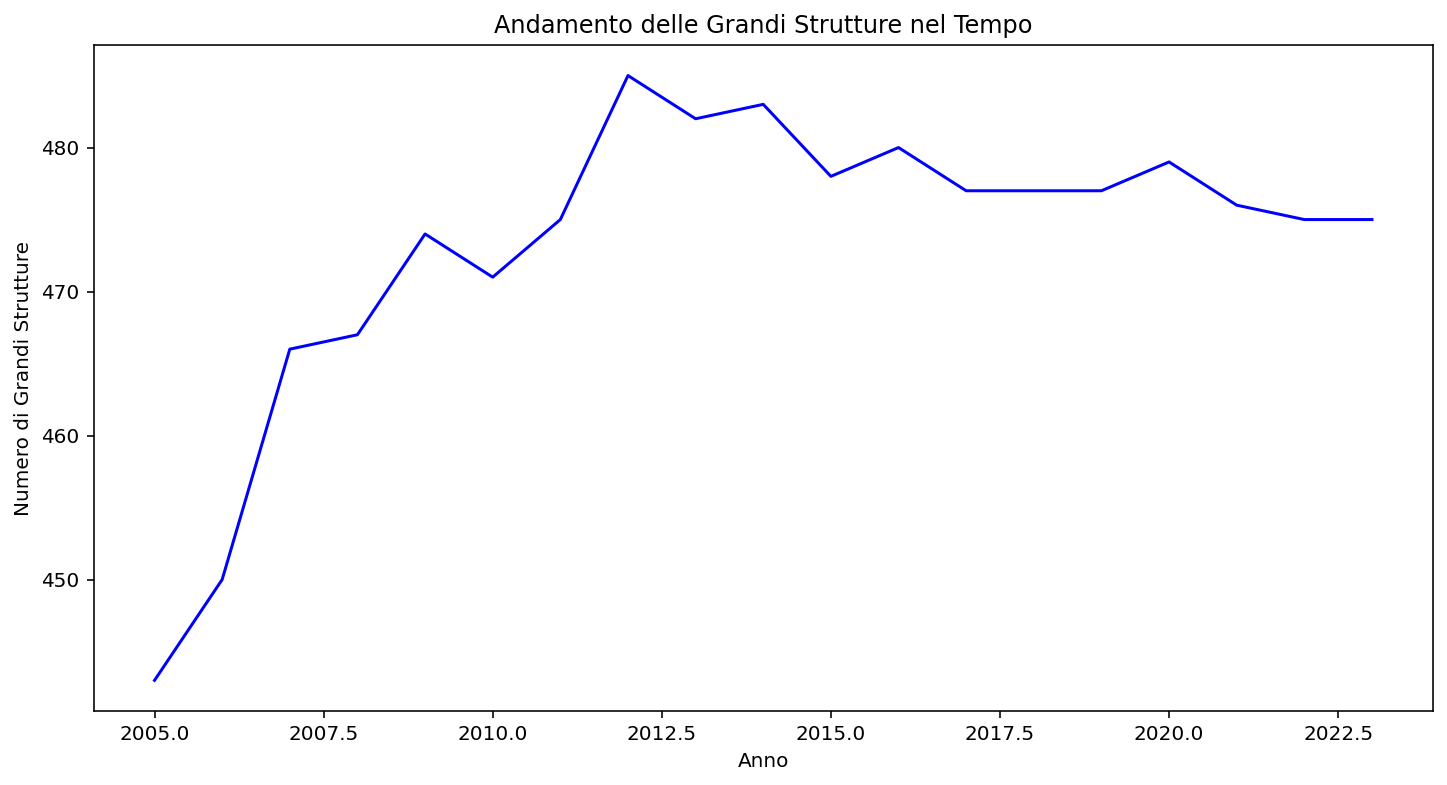

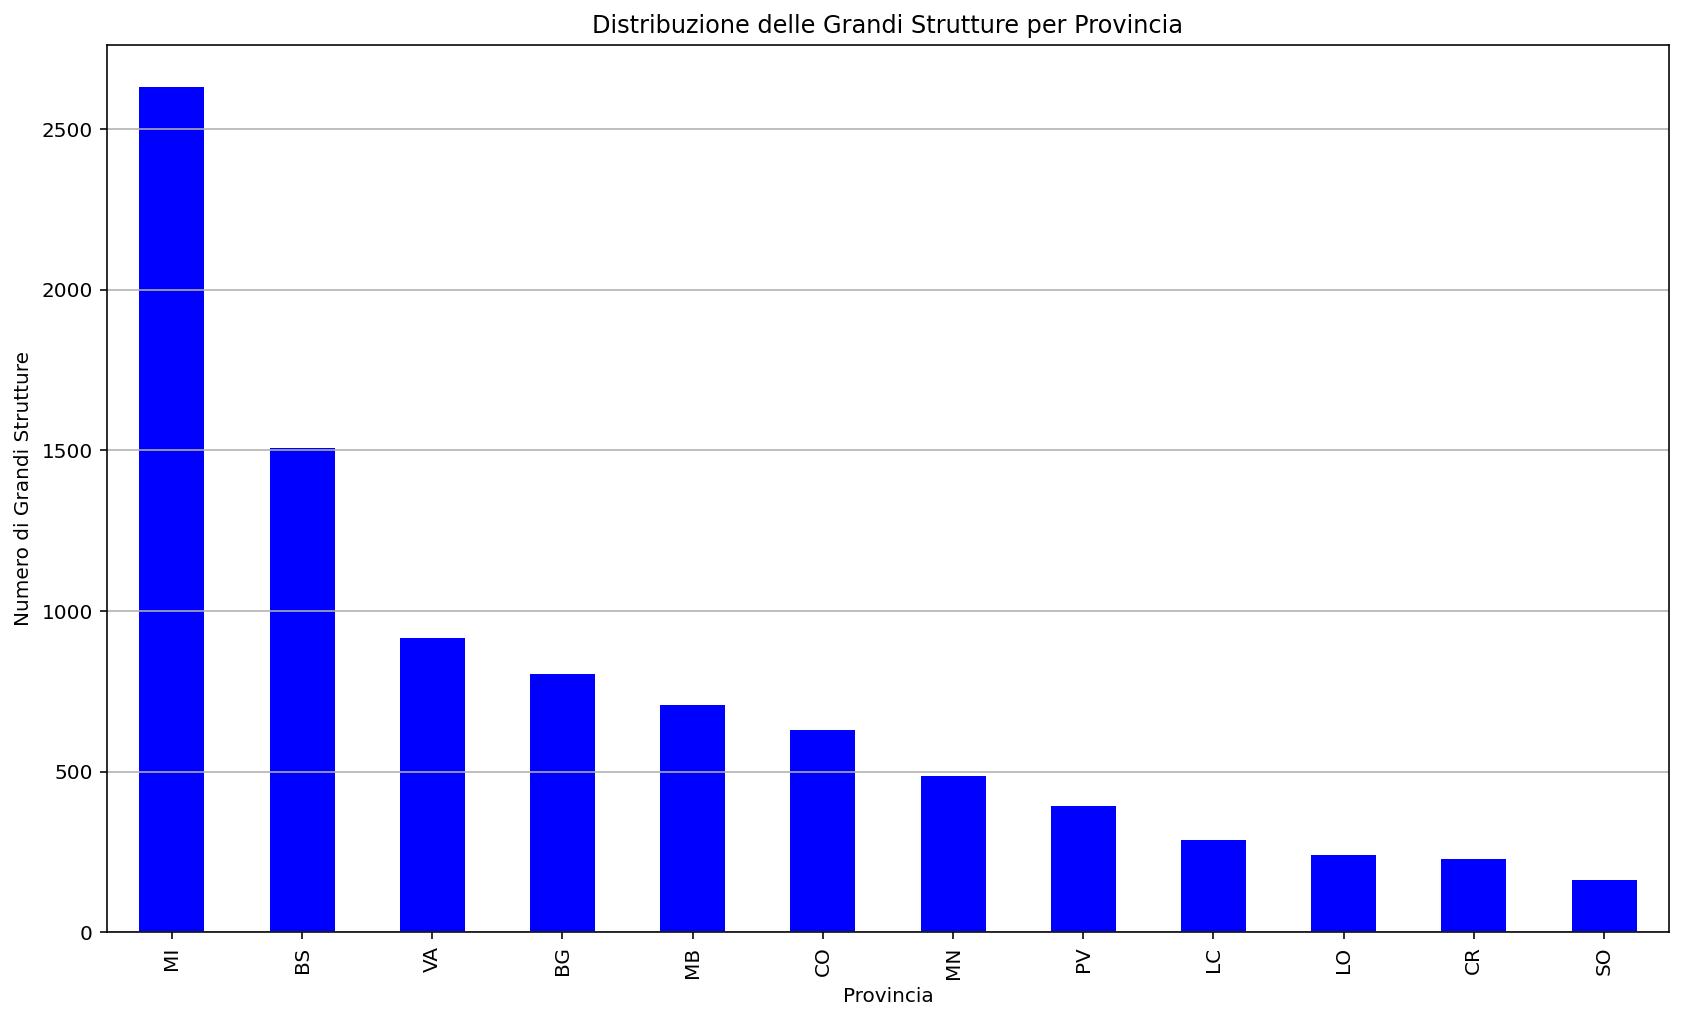

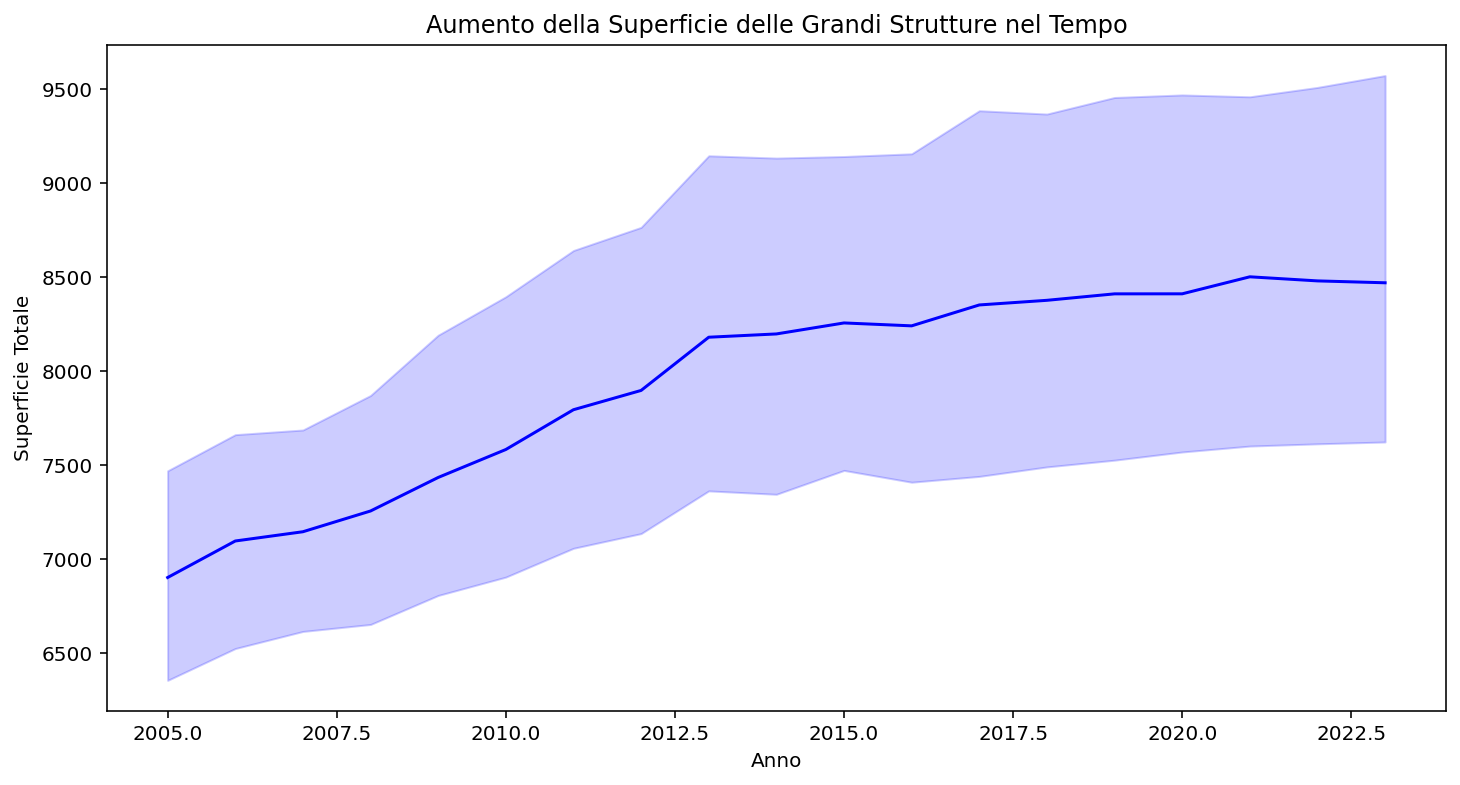

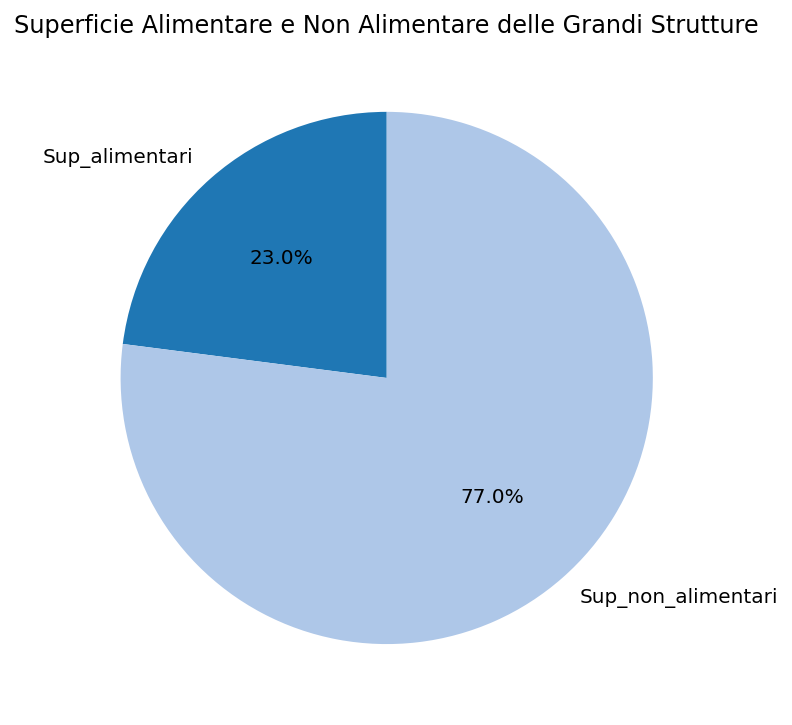

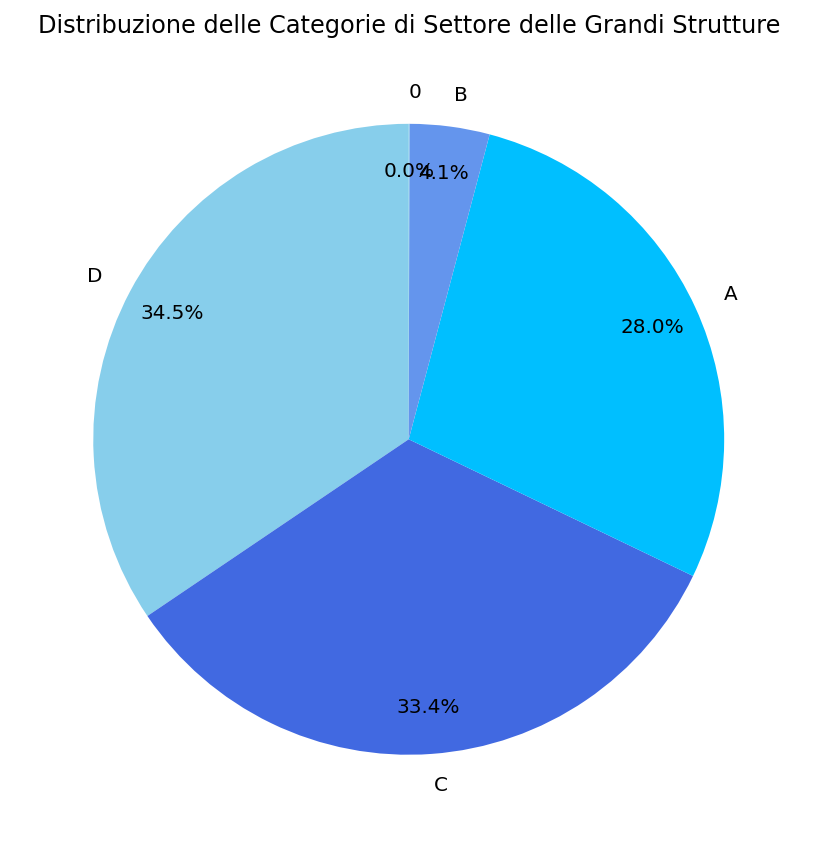

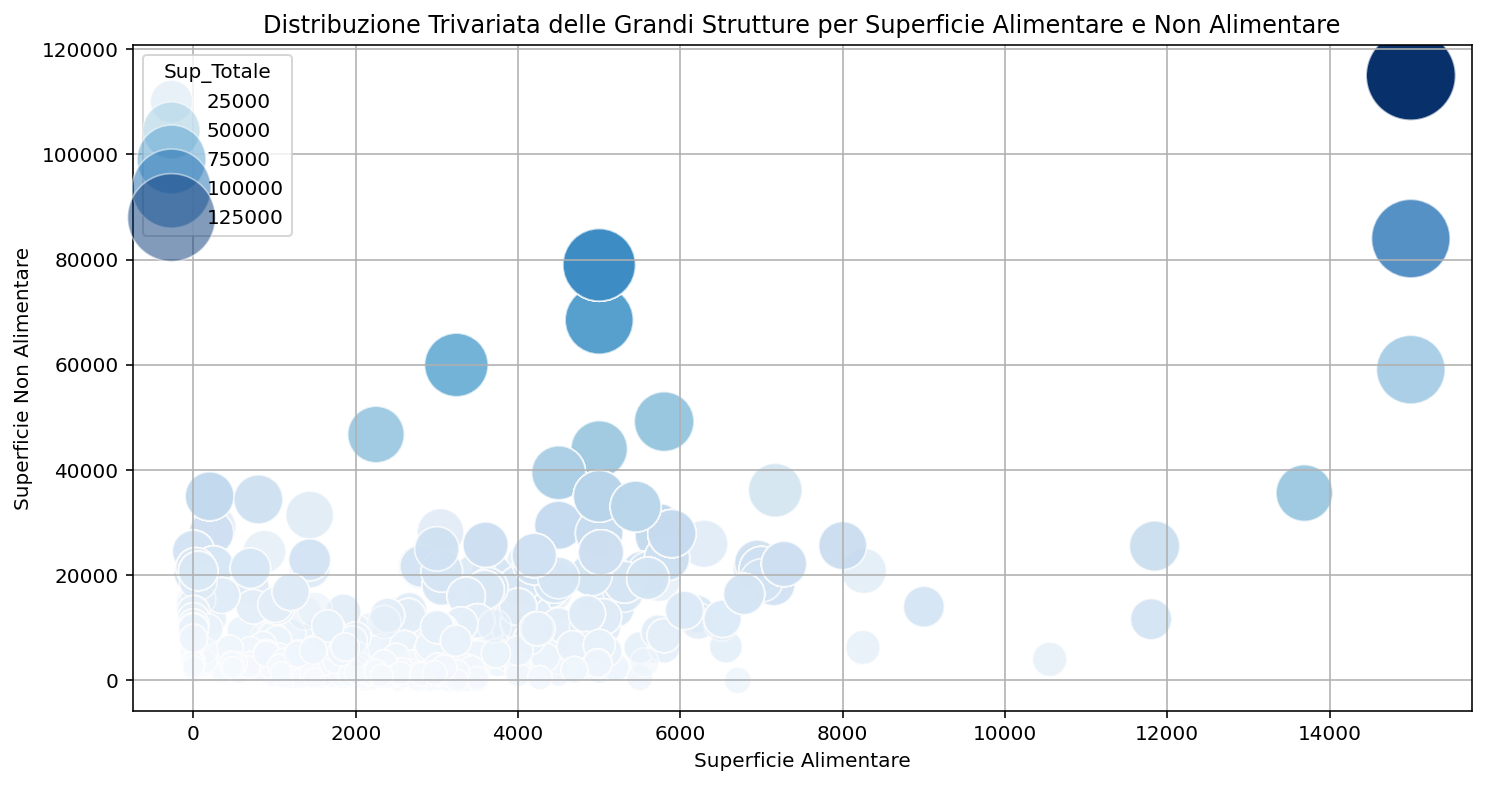

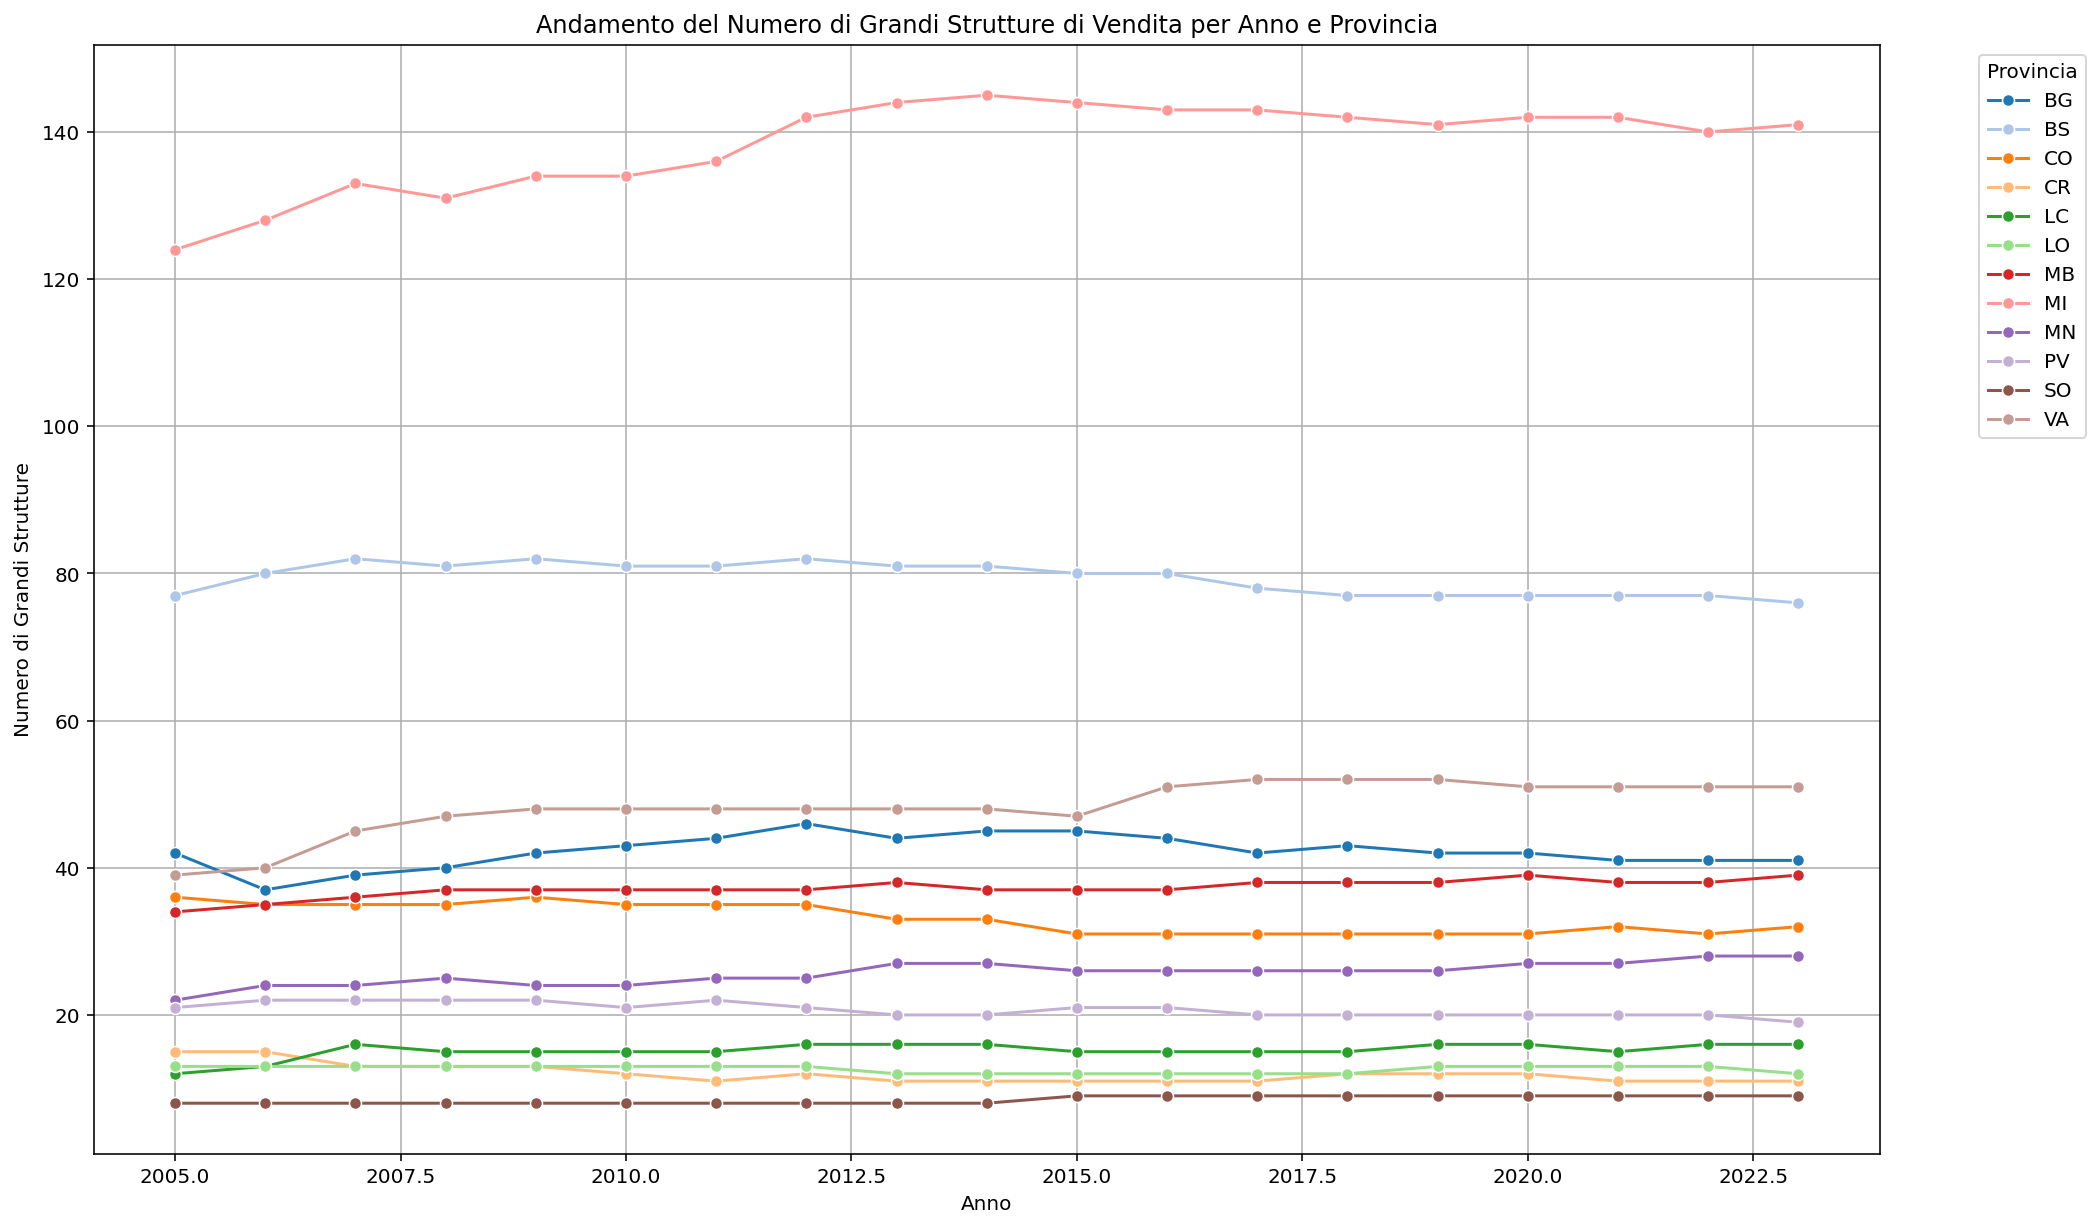

In [ ]:
#dashboard delle grandi strutture
pn.extension('bokeh', 'matplotlib')

# Funzioni per creare i grafici
def andamento_grandi_strutture(df):
    count_per_year = grandi_strutture_df.groupby('Anno').size().reset_index(name='Count')
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=count_per_year, x='Anno', y='Count', color='blue')
    plt.title('Andamento delle Grandi Strutture nel Tempo')
    plt.xlabel('Anno')
    plt.ylabel('Numero di Grandi Strutture')
    return plt.gcf()

def distribuzione_frequenza_grandi_strutture(df):
    province_counts = df['Provincia'].value_counts()
    plt.figure(figsize=(14, 8))
    province_counts.plot(kind='bar',color='blue')

    plt.xlabel('Provincia')
    plt.ylabel('Numero di Grandi Strutture')
    plt.title('Distribuzione delle Grandi Strutture per Provincia')
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    return plt.gcf()

def aumento_superficie_grandi_strutture(df):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=grandi_strutture_df, x='Anno', y='Sup_Totale',color='blue')
    plt.title('Aumento della Superficie delle Grandi Strutture nel Tempo')
    plt.xlabel('Anno')
    plt.ylabel('Superficie Totale')
    return plt.gcf()

def torta_superficie_grandi_strutture(df):
    plt.figure(figsize=(12, 6))
    superfici = grandi_strutture_df[['Sup_alimentari', 'Sup_non_alimentari']].sum()
    plt.pie(superfici, labels=superfici.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#aec7e8'])
    plt.title('Superficie Alimentare e Non Alimentare delle Grandi Strutture')
    return plt.gcf()

def torta_categorie_settore(df):
    categorie_settore_counts = grandi_strutture_df['Settore_merc_non_alim'].value_counts()

    plt.figure(figsize=(12, 6))
    plt.pie(
        categorie_settore_counts,
        labels=categorie_settore_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#87CEEB', '#4169E1', "#00BFFF", "#6495ED"],
        pctdistance=0.85,  # Distanza delle percentuali dal centro del grafico
        labeldistance=1.1  # Distanza delle etichette dal centro del grafico
    )
    plt.title('Distribuzione delle Categorie di Settore delle Grandi Strutture')
    plt.tight_layout()  # Migliora il layout per evitare sovrapposizioni
    return plt.gcf()

# Funzione per creare un grafico a bolle trivariato per superficie alimentare, non alimentare e totale
def distribuzione_bolle_trivariato(df, titolo):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='Sup_alimentari', y='Sup_non_alimentari', size='Sup_Totale', hue='Sup_Totale', sizes=(100, 2000), alpha=0.5, palette='Blues')
    plt.title(titolo)
    plt.xlabel('Superficie Alimentare')
    plt.ylabel('Superficie Non Alimentare')
    plt.grid(True)
    return plt.gcf()

# Funzione per creare il grafico a linee per il numero di grandi strutture per anno e provincia
def andamento_grandi_per_provincia(df, titolo):
    counts_per_anno_provincia = df.groupby(['Anno', 'Provincia']).size().reset_index(name='Count')
    plt.figure(figsize=(16, 10))
    sns.lineplot(data=counts_per_anno_provincia, x='Anno', y='Count', hue='Provincia', marker='o', palette='tab20')
    plt.xlabel('Anno')
    plt.ylabel('Numero di Grandi Strutture')
    plt.title(titolo)
    plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    return plt.gcf()

# Creazione della dashboard per le grandi strutture
dashboard_grandi_strutture = pn.Column(
    pn.pane.Markdown("## Dashboard Grandi Strutture"),
    pn.pane.Matplotlib(andamento_grandi_strutture(grandi_strutture_df), tight=True),
    pn.pane.Matplotlib(distribuzione_frequenza_grandi_strutture(grandi_strutture_df), tight=True),
    pn.pane.Matplotlib(aumento_superficie_grandi_strutture(grandi_strutture_df), tight=True),
    pn.pane.Matplotlib(torta_superficie_grandi_strutture(grandi_strutture_df), tight=True),
    pn.pane.Matplotlib(torta_categorie_settore(grandi_strutture_df), tight=True),
    pn.pane.Matplotlib(distribuzione_bolle_trivariato(grandi_strutture_df, 'Distribuzione Trivariata delle Grandi Strutture per Superficie Alimentare e Non Alimentare'), tight=True),
    pn.pane.Matplotlib(andamento_grandi_per_provincia(grandi_strutture_df, 'Andamento del Numero di Grandi Strutture di Vendita per Anno e Provincia'), tight=True)
)

# Mostra la dashboard
dashboard_grandi_strutture.show()

# Esporta la dashboard come HTML
dashboard_grandi_strutture.save('dashboard_grandi_strutture.http')

##Dashboard Medie Strutture

Launching server at http://localhost:39891


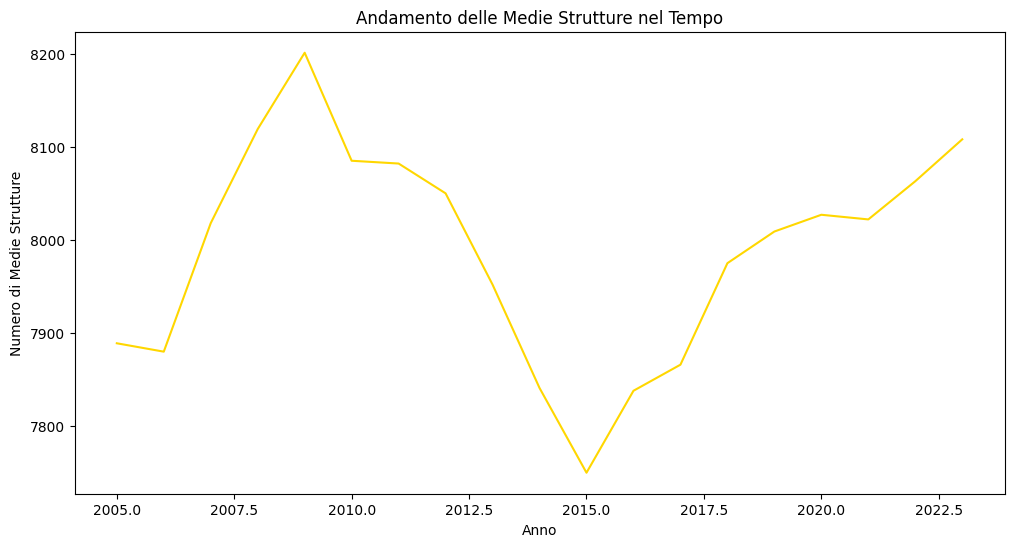

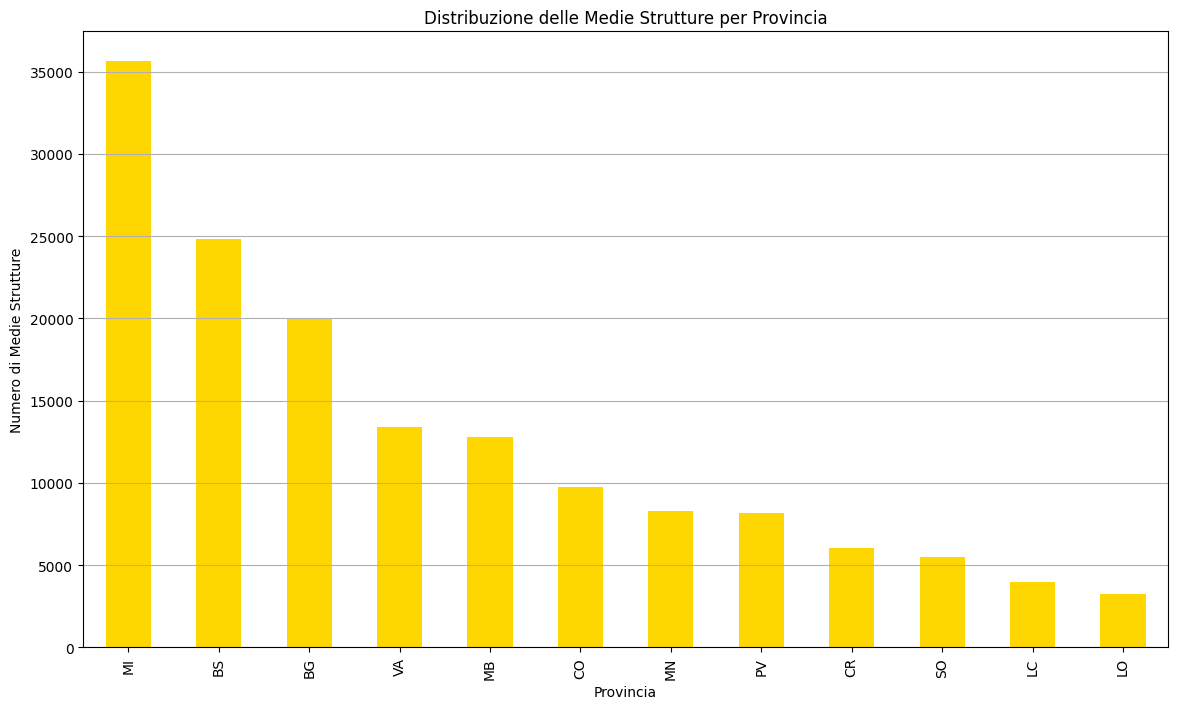

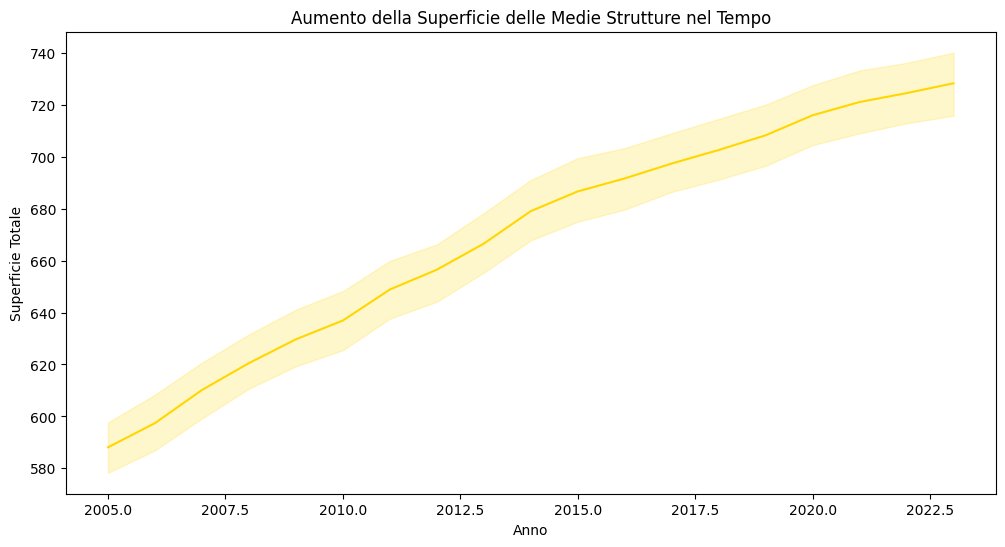

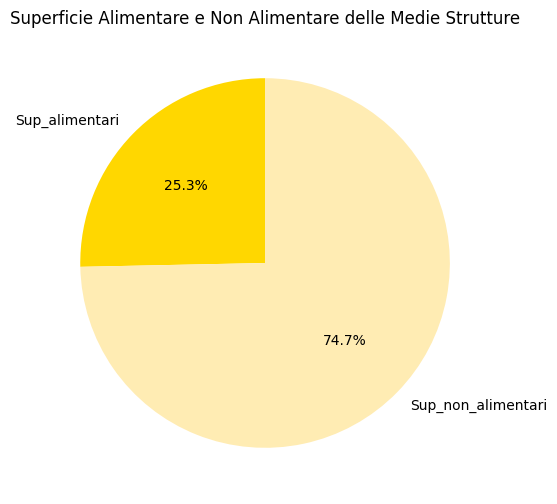

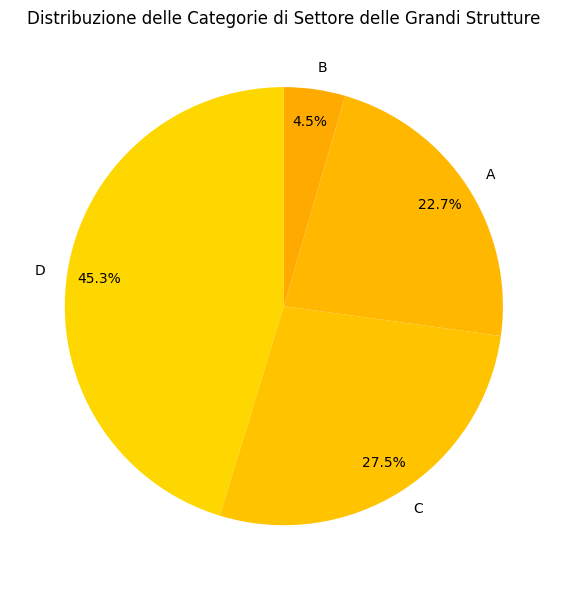

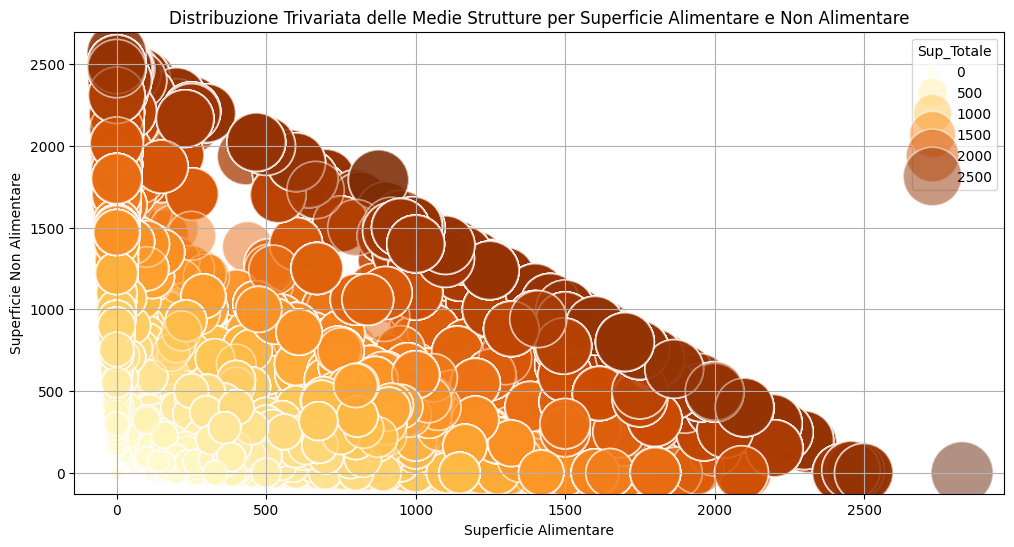

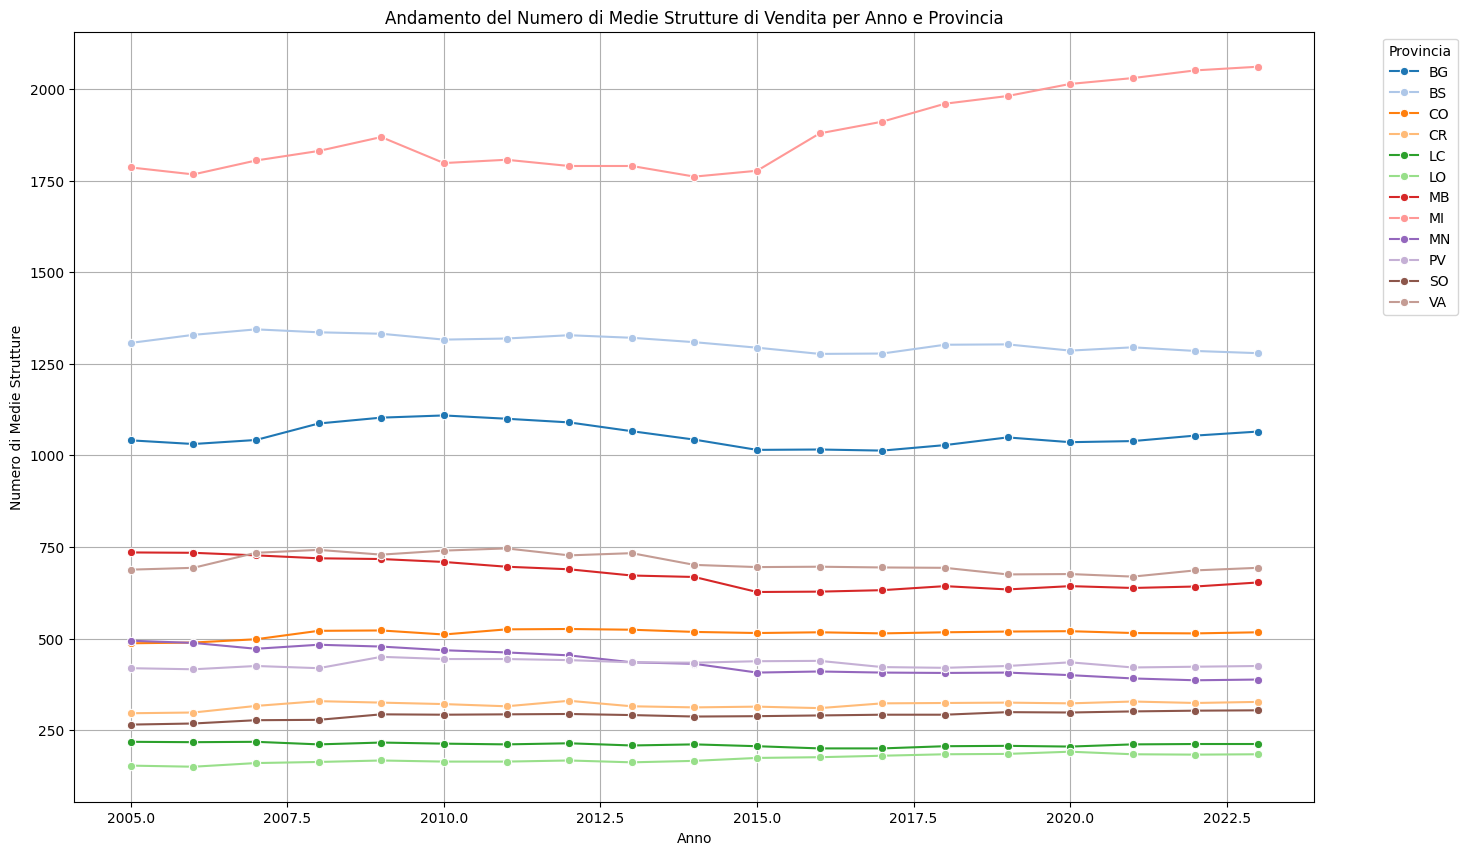

In [ ]:
#dashboard delle medie strutture
def andamento_medie_strutture(df):
    count_per_year = medie_strutture_df.groupby('Anno').size().reset_index(name='Count')
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=count_per_year, x='Anno', y='Count', color='gold')
    plt.title('Andamento delle Medie Strutture nel Tempo')
    plt.xlabel('Anno')
    plt.ylabel('Numero di Medie Strutture')
    return plt.gcf()

def distribuzione_frequenza_medie_strutture(df):
    province_counts = medie_strutture_df['Provincia'].value_counts()
    plt.figure(figsize=(14, 8))
    province_counts.plot(kind='bar', color='gold')
    plt.xlabel('Provincia')
    plt.ylabel('Numero di Medie Strutture')
    plt.title('Distribuzione delle Medie Strutture per Provincia')
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    return plt.gcf()

def aumento_superficie_medie_strutture(df):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=medie_strutture_df, x='Anno', y='Sup_Totale', color='gold')
    plt.title('Aumento della Superficie delle Medie Strutture nel Tempo')
    plt.xlabel('Anno')
    plt.ylabel('Superficie Totale')
    return plt.gcf()

def torta_superficie_medie_strutture(df):
    plt.figure(figsize=(12, 6))
    superfici = medie_strutture_df[['Sup_alimentari', 'Sup_non_alimentari']].sum()
    plt.pie(superfici, labels=superfici.index, autopct='%1.1f%%', startangle=90, colors=['#ffd700', '#ffecb3'])
    plt.title('Superficie Alimentare e Non Alimentare delle Medie Strutture')
    return plt.gcf()

def torta_categorie_settore(df):
    categorie_settore_counts = medie_strutture_df['Settore_merc_non_alim'].value_counts()

    plt.figure(figsize=(12, 6))
    plt.pie(
        categorie_settore_counts,
        labels=categorie_settore_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#FFD700', '#FFC300', "#FFB700", "#FFAA00"],
        pctdistance=0.85,  # Distanza delle percentuali dal centro del grafico
        labeldistance=1.1  # Distanza delle etichette dal centro del grafico
    )
    plt.title('Distribuzione delle Categorie di Settore delle Grandi Strutture')
    plt.tight_layout()  # Migliora il layout per evitare sovrapposizioni
    return plt.gcf()

def distribuzione_bolle_trivariato(df, titolo):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='Sup_alimentari', y='Sup_non_alimentari', size='Sup_Totale', hue='Sup_Totale', sizes=(100, 2000), alpha=0.5, palette='YlOrBr')
    plt.title(titolo)
    plt.xlabel('Superficie Alimentare')
    plt.ylabel('Superficie Non Alimentare')
    plt.grid(True)
    return plt.gcf()

def andamento_medie_per_provincia(df, titolo):
    counts_per_anno_provincia = df.groupby(['Anno', 'Provincia']).size().reset_index(name='Count')
    plt.figure(figsize=(16, 10))
    sns.lineplot(data=counts_per_anno_provincia, x='Anno', y='Count', hue='Provincia', marker='o', palette='tab20')
    plt.xlabel('Anno')
    plt.ylabel('Numero di Medie Strutture')
    plt.title(titolo)
    plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    return plt.gcf()

# Creazione della dashboard per le medie strutture
dashboard_medie_strutture = pn.Column(
    pn.pane.Markdown("## Dashboard Medie Strutture"),
    pn.pane.Matplotlib(andamento_medie_strutture(medie_strutture_df), tight=True),
    pn.pane.Matplotlib(distribuzione_frequenza_medie_strutture(medie_strutture_df), tight=True),
    pn.pane.Matplotlib(aumento_superficie_medie_strutture(medie_strutture_df), tight=True),
    pn.pane.Matplotlib(torta_superficie_medie_strutture(medie_strutture_df), tight=True),
    pn.pane.Matplotlib(torta_categorie_settore(medie_strutture_df), tight=True),
    pn.pane.Matplotlib(distribuzione_bolle_trivariato(medie_strutture_df, 'Distribuzione Trivariata delle Medie Strutture per Superficie Alimentare e Non Alimentare'), tight=True),
    pn.pane.Matplotlib(andamento_medie_per_provincia(medie_strutture_df, 'Andamento del Numero di Medie Strutture di Vendita per Anno e Provincia'), tight=True)
)

# Mostra la dashboard
dashboard_medie_strutture.show()

##Dashboard Esercizi di Vicinato

Launching server at http://localhost:37927


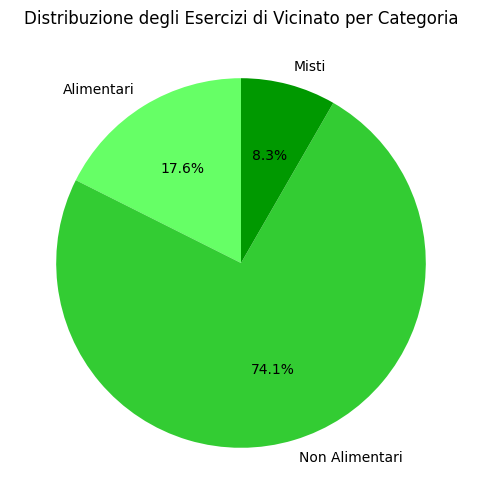

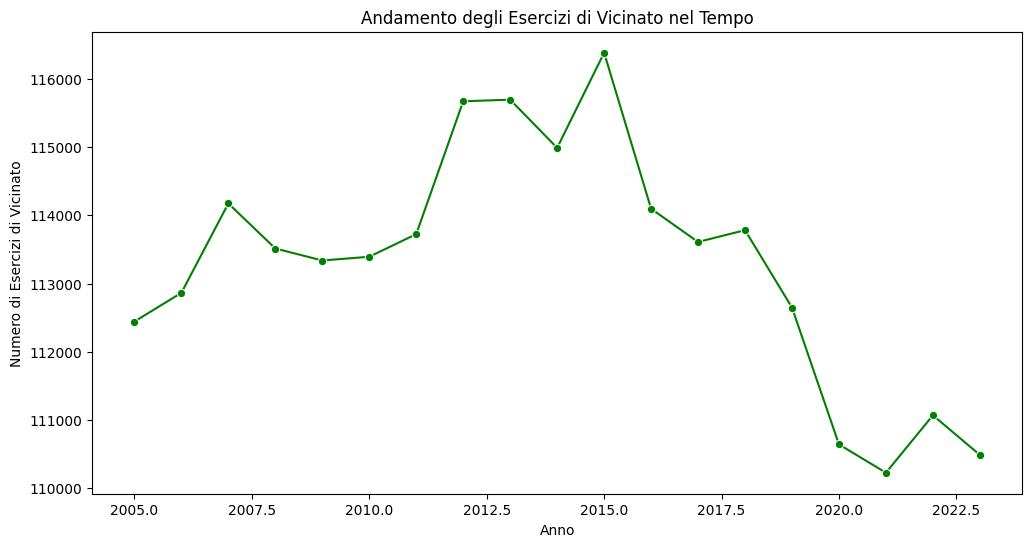

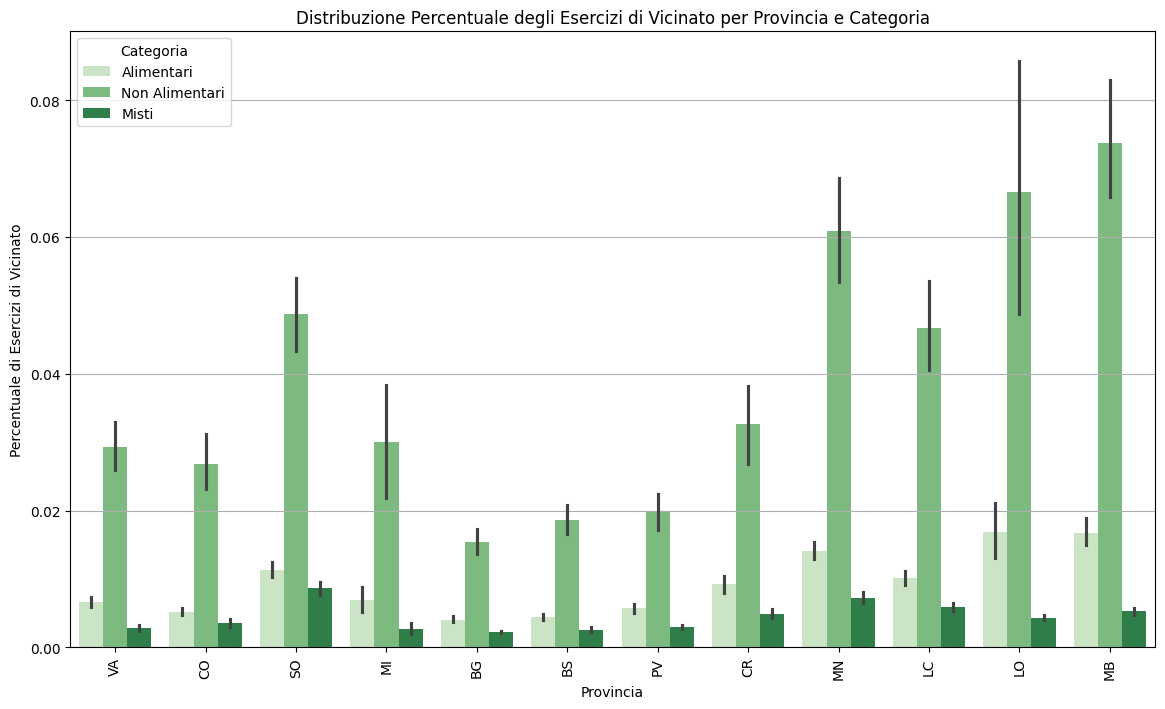

In [ ]:
#dashboard del vicinato

def torta_vicinato(df):
    counts = vicinato_df[['N°alimentari', 'N°non alimentari', 'N°Misti']].sum()
    plt.figure(figsize=(10, 6))
    plt.pie(counts, labels=['Alimentari', 'Non Alimentari', 'Misti'], autopct='%1.1f%%', startangle=90, colors=['#66ff66', '#33cc33', '#009900'])
    plt.title('Distribuzione degli Esercizi di Vicinato per Categoria')
    return plt.gcf()

# Funzione per creare l'andamento degli esercizi di vicinato nel tempo
def andamento_vicinato(df):
    count_per_year = vicinato_df.groupby('Anno')["N° TOT"].sum().reset_index(name='Count')
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=count_per_year, x='Anno', y='Count', marker='o', color='green')
    plt.title('Andamento degli Esercizi di Vicinato nel Tempo')
    plt.xlabel('Anno')
    plt.ylabel('Numero di Esercizi di Vicinato')
    return plt.gcf()

# Funzione per creare la distribuzione geografica degli esercizi di vicinato
def distribuzione_geografica_vicinato(df):
    # Melt the dataframe to get a long format
    df_melted = df.melt(id_vars=['Provincia'], value_vars=['N°alimentari', 'N°non alimentari', 'N°Misti'],
                        var_name='Categoria', value_name='Count')
    df_melted['Categoria'] = df_melted['Categoria'].map({'N°alimentari': 'Alimentari', 'N°non alimentari': 'Non Alimentari', 'N°Misti': 'Misti'})

    # Calculate the percentage for each category within each province
    df_melted['Percentage'] = df_melted.groupby('Provincia')['Count'].transform(lambda x: x / x.sum() * 100)

    # Create the bar plot
    plt.figure(figsize=(14, 8))
    sns.barplot(data=df_melted, x='Provincia', y='Percentage', hue='Categoria', palette='Greens')
    plt.xlabel('Provincia')
    plt.ylabel('Percentuale di Esercizi di Vicinato')
    plt.title('Distribuzione Percentuale degli Esercizi di Vicinato per Provincia e Categoria')
    plt.xticks(rotation=90)
    plt.grid(axis='y')

    return plt.gcf()

# Creazione della dashboard per gli esercizi di vicinato
dashboard_vicinato = pn.Column(
    pn.pane.Markdown("## Dashboard Esercizi di Vicinato"),
    pn.pane.Matplotlib(torta_vicinato(vicinato_df), tight=True),
    pn.pane.Matplotlib(andamento_vicinato(vicinato_df), tight=True),
    pn.pane.Matplotlib(distribuzione_geografica_vicinato(vicinato_df), tight=True),
)

# Mostra la dashboard
dashboard_vicinato.show()

#Confronti

Di seguito si propongono, con l'ausilio di metodi grafici, alcuni confronti tra medie strutture, grandi strutture e esercizi di vicinato.

Column
    [0] Markdown(str)
    [1] Matplotlib(Figure, tight=True)
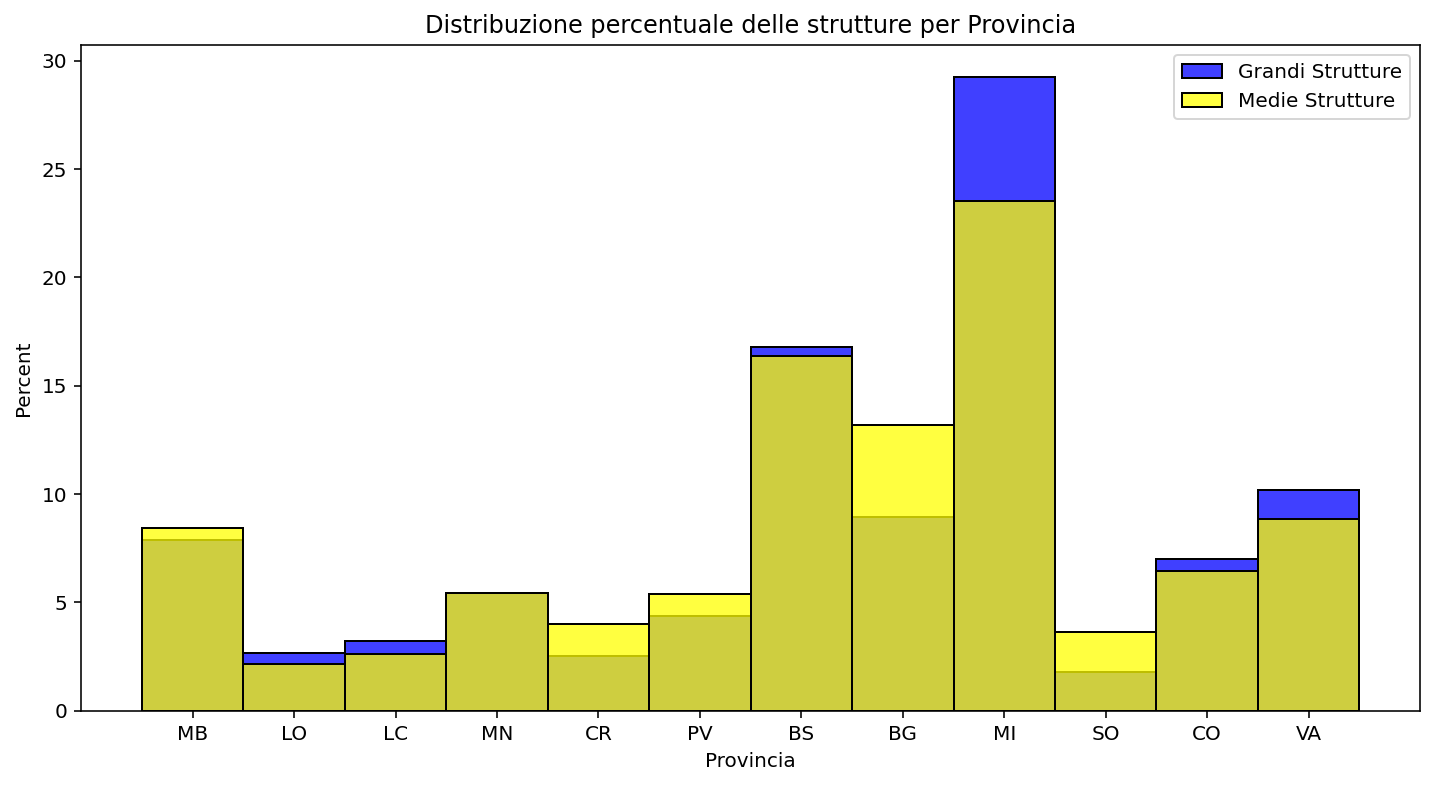

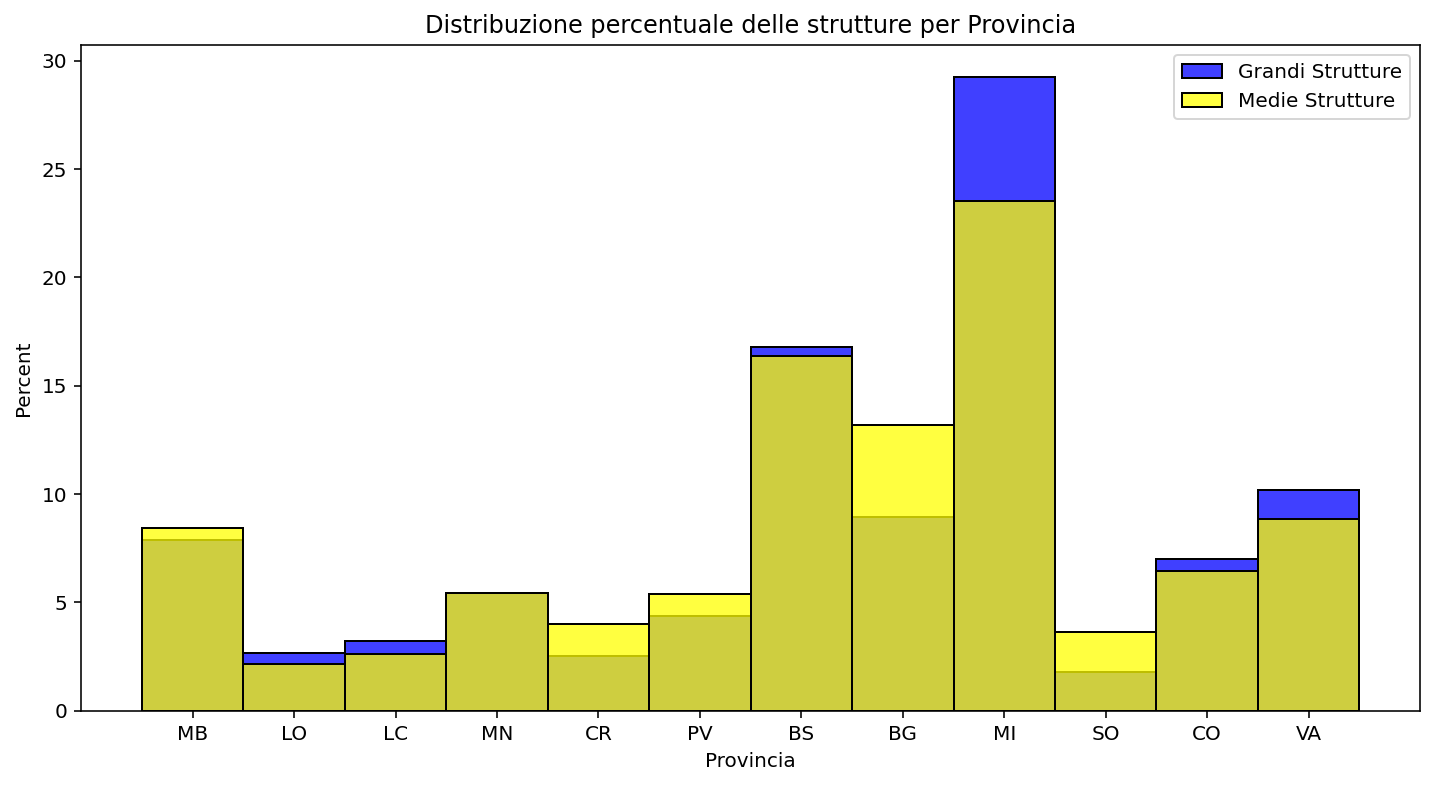

In [ ]:

pn.extension('bokeh', 'matplotlib')

# Esempio di dataframe (devi sostituirli con i tuoi dati reali)
# grandi_strutture_df = pd.read_csv('path_to_your_grandi_strutture_data.csv')
# medie_strutture_df = pd.read_csv('path_to_your_medie_strutture_data.csv')

# Funzione per creare il primo grafico
def plot1():
    plt.figure(figsize=(12, 6))
    sns.histplot(data=grandi_strutture_df, x="Provincia", binwidth=0.4,color="blue", stat="percent", label='Grandi Strutture')
    sns.histplot(data=medie_strutture_df, x="Provincia", color="yellow", binwidth=0.4, stat="percent", label='Medie Strutture')
    plt.legend()
    plt.title('Distribuzione percentuale delle strutture per Provincia')
    return plt.gcf()

# Creazione della dashboard
dashboard = pn.Column(
    pn.pane.Markdown("## Dashboard delle Strutture per Provincia"),
    pn.pane.Matplotlib(plot1(), tight=True),
)

#aggiungiamo vicinato
# Mostra la dashboard
dashboard.servable()


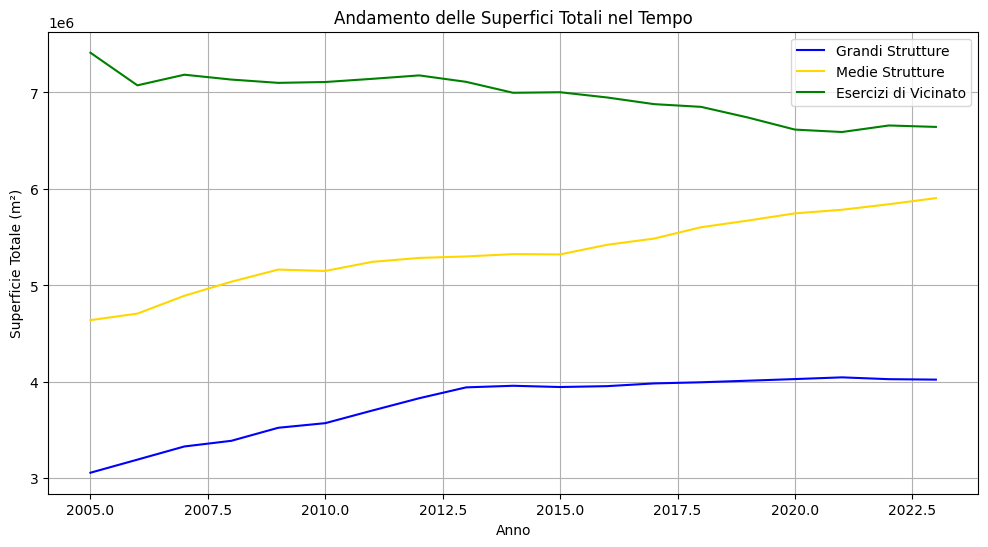

In [ ]:
# Crea il grafico
plt.figure(figsize=(12, 6))
plt.plot(grandi_totali.index, grandi_totali.values, label='Grandi Strutture', color="blue")
plt.plot(medie_totali.index, medie_totali.values, label='Medie Strutture', color="gold")
plt.plot(vicinato_totali.index, vicinato_totali.values, label='Esercizi di Vicinato', color="green")

plt.xlabel('Anno')
plt.ylabel('Superficie Totale (m²)')
plt.title('Andamento delle Superfici Totali nel Tempo')
plt.legend()
plt.grid(True)
plt.show()

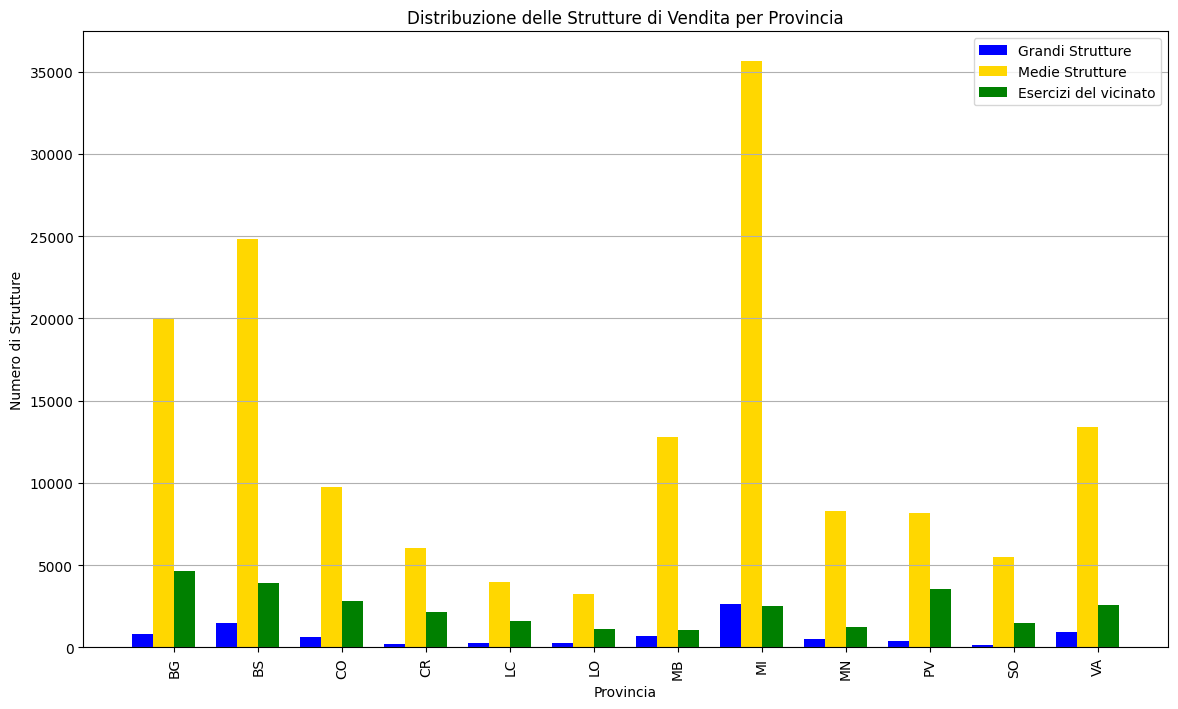

In [ ]:
province_counts_grandi = grandi_strutture_df['Provincia'].value_counts()
province_counts_medie = medie_strutture_df['Provincia'].value_counts()
province_counts_vicinato = vicinato_df['Provincia'].value_counts()

# Combina i conteggi in un unico DataFrame
combined_counts = pd.DataFrame({
    'Grandi Strutture': province_counts_grandi,
    'Medie Strutture': province_counts_medie,
    "Esercizi di Vicinato": province_counts_vicinato
}).fillna(0)  # Riempie i valori NaN con 0

# Crea un istogramma con barre affiancate
fig, ax = plt.subplots(figsize=(14, 8))

width = 0.25  # Larghezza delle barre
indices = np.arange(len(combined_counts))

ax.bar(indices - width, combined_counts['Grandi Strutture'], width=width, label='Grandi Strutture', color='blue')
ax.bar(indices, combined_counts['Medie Strutture'], width=width, label='Medie Strutture', color='gold')
ax.bar(indices + width, combined_counts['Esercizi di Vicinato'], width=width, label='Esercizi del vicinato', color='green')

ax.set_xlabel('Provincia')
ax.set_ylabel('Numero di Strutture')
ax.set_title('Distribuzione delle Strutture di Vendita per Provincia')
ax.set_xticks([i + width / 2 for i in indices])
ax.set_xticklabels(combined_counts.index, rotation=90)
ax.legend()
ax.grid(axis='y')

plt.show()

##Dashboard di confronto rispetto alla Provincia di Milano

Si analizza la distribuzione di grandi strutture, medie strutture e esercizi di vicinato e l'andamento nel corso del tempo dell'incremento o diminuzione della superficie totale dei tre.

<ipython-input-19-35913e74db65>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milano_vicinato_df['Tipologia'] = 'Esercizi di Vicinato'
<ipython-input-19-35913e74db65>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milano_grandi_df['Tipologia'] = 'Grandi Strutture'
<ipython-input-19-35913e74db65>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Launching server at http://localhost:41835


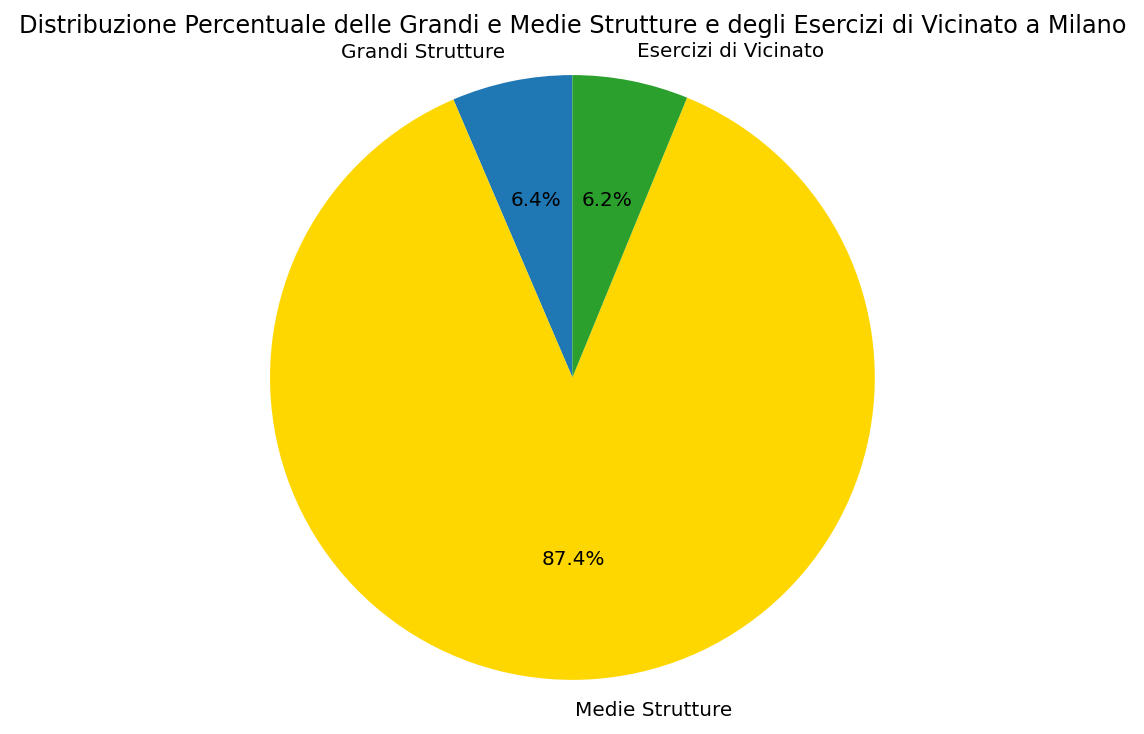

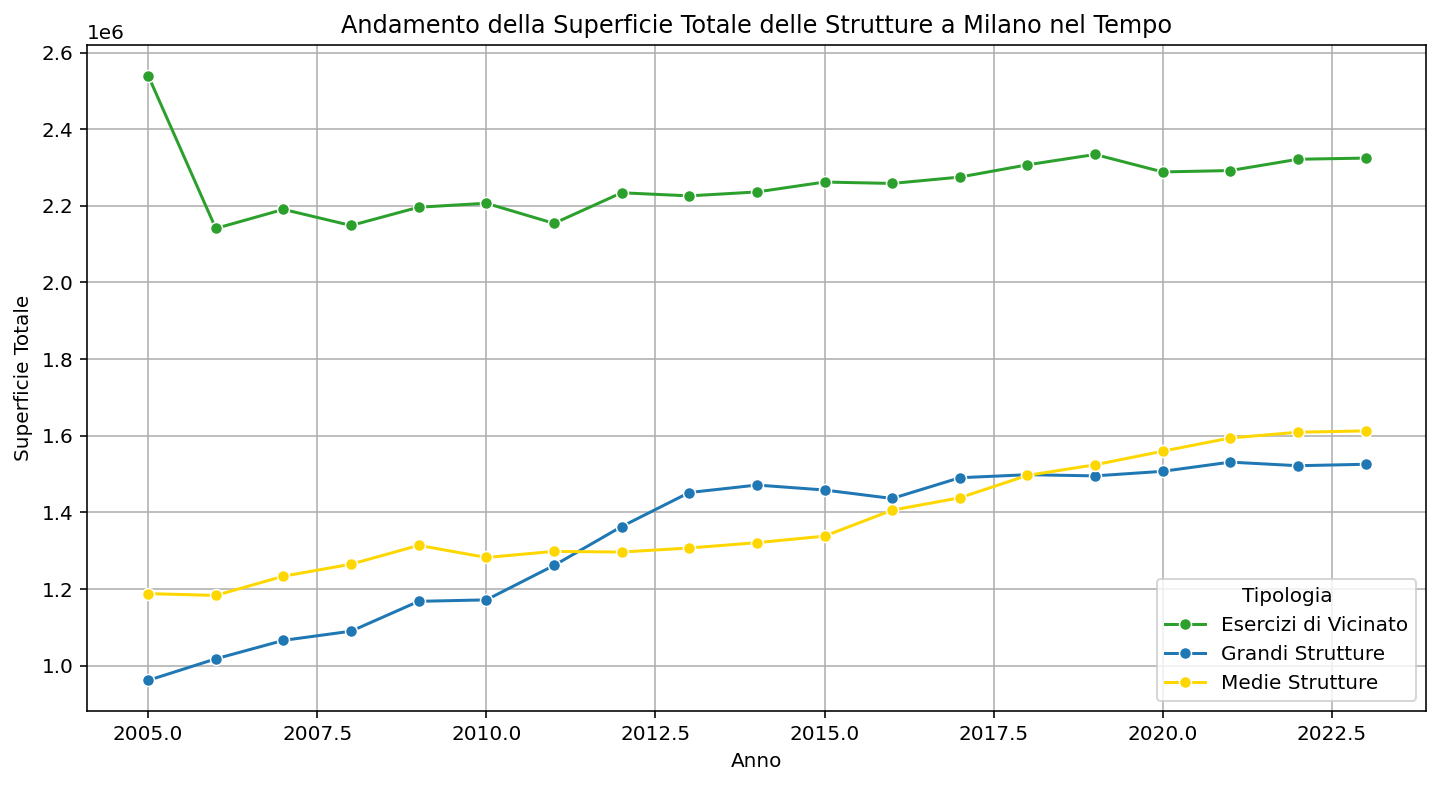

In [ ]:
#Dashboard Milano
milano_vicinato_df = vicinato_df[vicinato_df['Provincia'] == 'MI']
milano_grandi_df = grandi_strutture_df[grandi_strutture_df['Provincia'] == 'MI']
milano_medie_df = medie_strutture_df[medie_strutture_df['Provincia'] == 'MI']

# Aggiungere la colonna 'Tipologia'
milano_vicinato_df['Tipologia'] = 'Esercizi di Vicinato'
milano_grandi_df['Tipologia'] = 'Grandi Strutture'
milano_medie_df['Tipologia'] = 'Medie Strutture'

# Rinominare le colonne delle superfici per avere un nome comune
milano_vicinato_df = milano_vicinato_df.rename(columns={'Sup. TOT': 'Superficie Totale'})
milano_grandi_df = milano_grandi_df.rename(columns={'Sup_Totale': 'Superficie Totale'})
milano_medie_df = milano_medie_df.rename(columns={'Sup_Totale': 'Superficie Totale'})

# Concatenare i dati
combined_df = pd.concat([milano_vicinato_df, milano_grandi_df, milano_medie_df])

# Funzione per creare un grafico a torta della distribuzione delle grandi e medie strutture a Milano
def torta_distribuzione_strutture_milano(grandi_df, medie_df, vicinato_df):
    grandi_count = grandi_df.shape[0]
    medie_count = medie_df.shape[0]
    vicinato_count = vicinato_df.shape[0]
    labels = ['Grandi Strutture', 'Medie Strutture', 'Esercizi di Vicinato']
    sizes = [grandi_count, medie_count, vicinato_count]
    colors = ['#1f77b4', '#ffd700', '#2ca02c']
    plt.figure(figsize=(10, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title('Distribuzione Percentuale delle Grandi e Medie Strutture e degli Esercizi di Vicinato a Milano')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    return plt.gcf()


# Funzione per creare l'andamento della superficie totale per ciascun tipo di struttura a Milano nel tempo
def andamento_superficie_totale_milano(combined_df):
    superficie_per_year = combined_df.groupby(['Anno', 'Tipologia'])['Superficie Totale'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=superficie_per_year, x='Anno', y='Superficie Totale', hue='Tipologia', marker='o', palette={'Grandi Strutture': '#1f77b4', 'Medie Strutture': '#ffd700', 'Esercizi di Vicinato': '#2ca02c'})
    plt.title('Andamento della Superficie Totale delle Strutture a Milano nel Tempo')
    plt.xlabel('Anno')
    plt.ylabel('Superficie Totale')
    plt.legend(title='Tipologia')
    plt.grid(True)
    return plt.gcf()

# Creazione della dashboard per Milano
dashboard_milano = pn.Column(
    pn.pane.Markdown("## Dashboard Esercizi di Vendita - Milano"),
    pn.pane.Markdown("### Distribuzione Percentuale delle Strutture"),
    pn.pane.Matplotlib(torta_distribuzione_strutture_milano(milano_grandi_df, milano_medie_df, milano_vicinato_df), tight=True),
    pn.pane.Markdown("### Andamento della Superficie Totale nel Tempo"),
    pn.pane.Matplotlib(andamento_superficie_totale_milano(combined_df), tight=True)
)

# Mostra la dashboard
dashboard_milano.show()

# Esporta la dashboard come HTML
dashboard_milano.save('dashboard_milano.html')

#Dashboard Unica

In quest'ultima sezione si propone una dashboard riassuntiva, comprensiva delle precedenti, per facilitare l'analisi delle differenze tra i dataset

In [ ]:
dashboard_unica = pn.Tabs(
    ("Grandi Strutture", dashboard_grandi_strutture),
    ("Medie Strutture", dashboard_medie_strutture),
    ("Esercizi di Vicinato", dashboard_vicinato),
    ("Provincia di Milano", dashboard_milano)
)
dashboard_unica.show()
dashboard_unica.save('dashboard_unica.html')


Launching server at http://localhost:40775


Launching server at http://localhost:45035


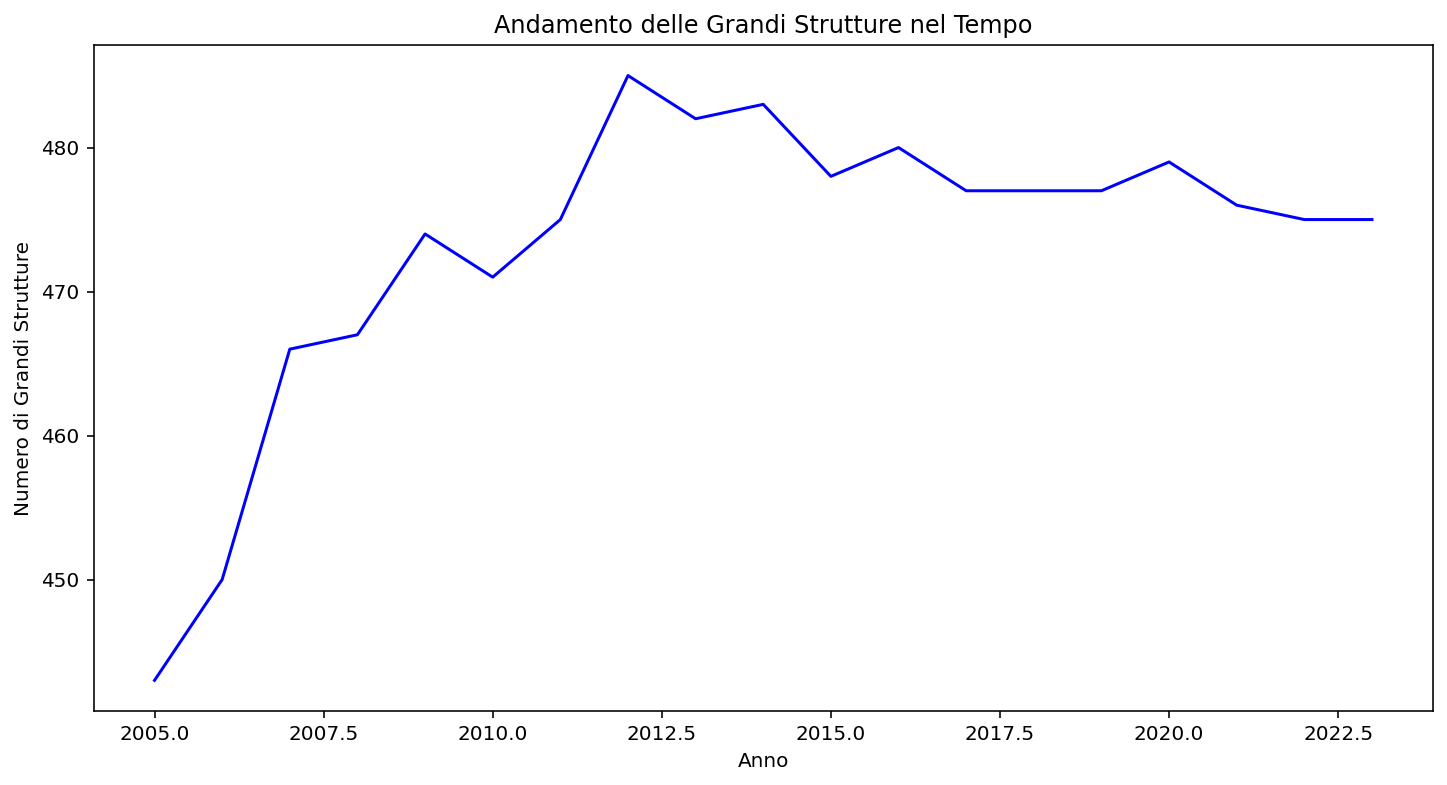

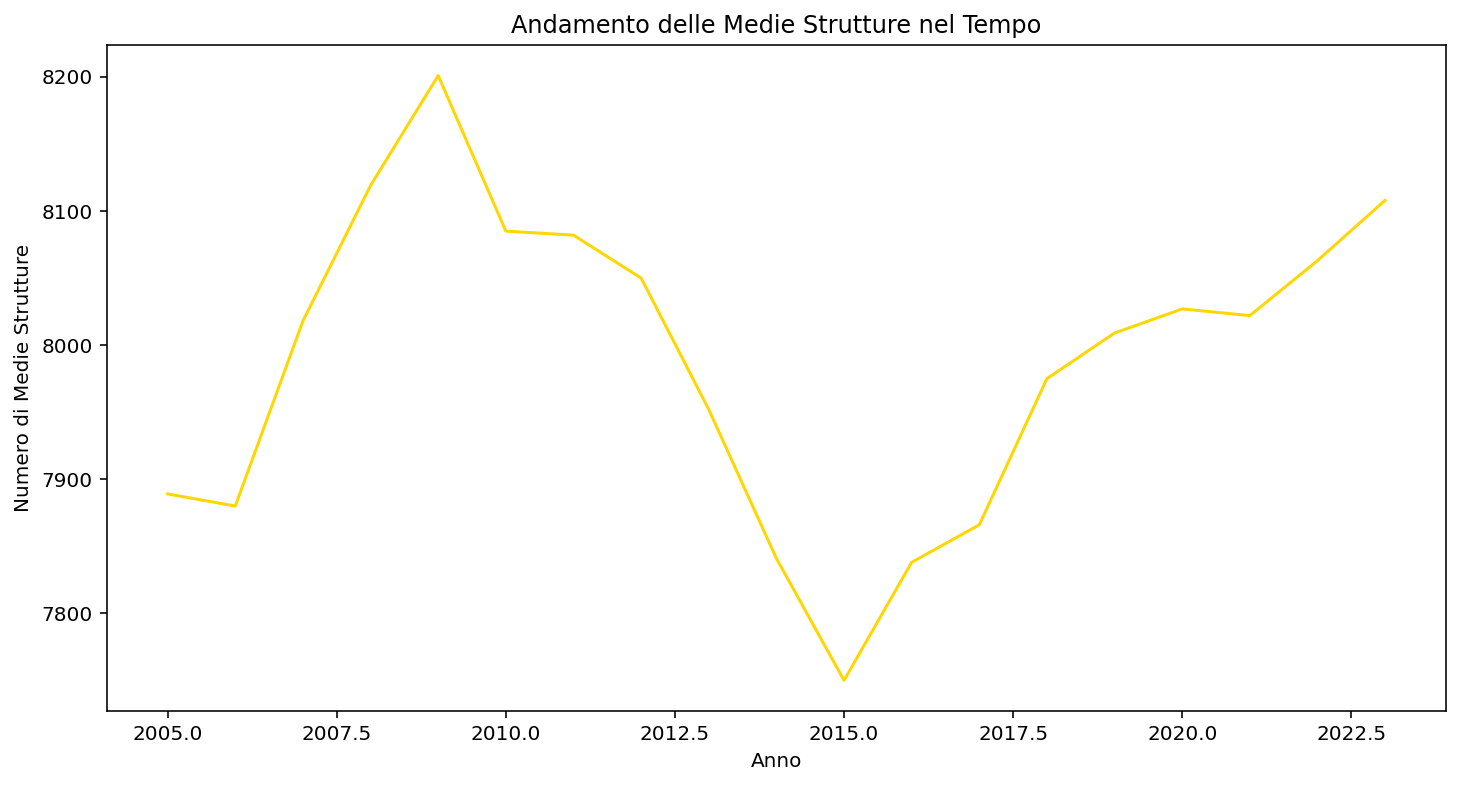

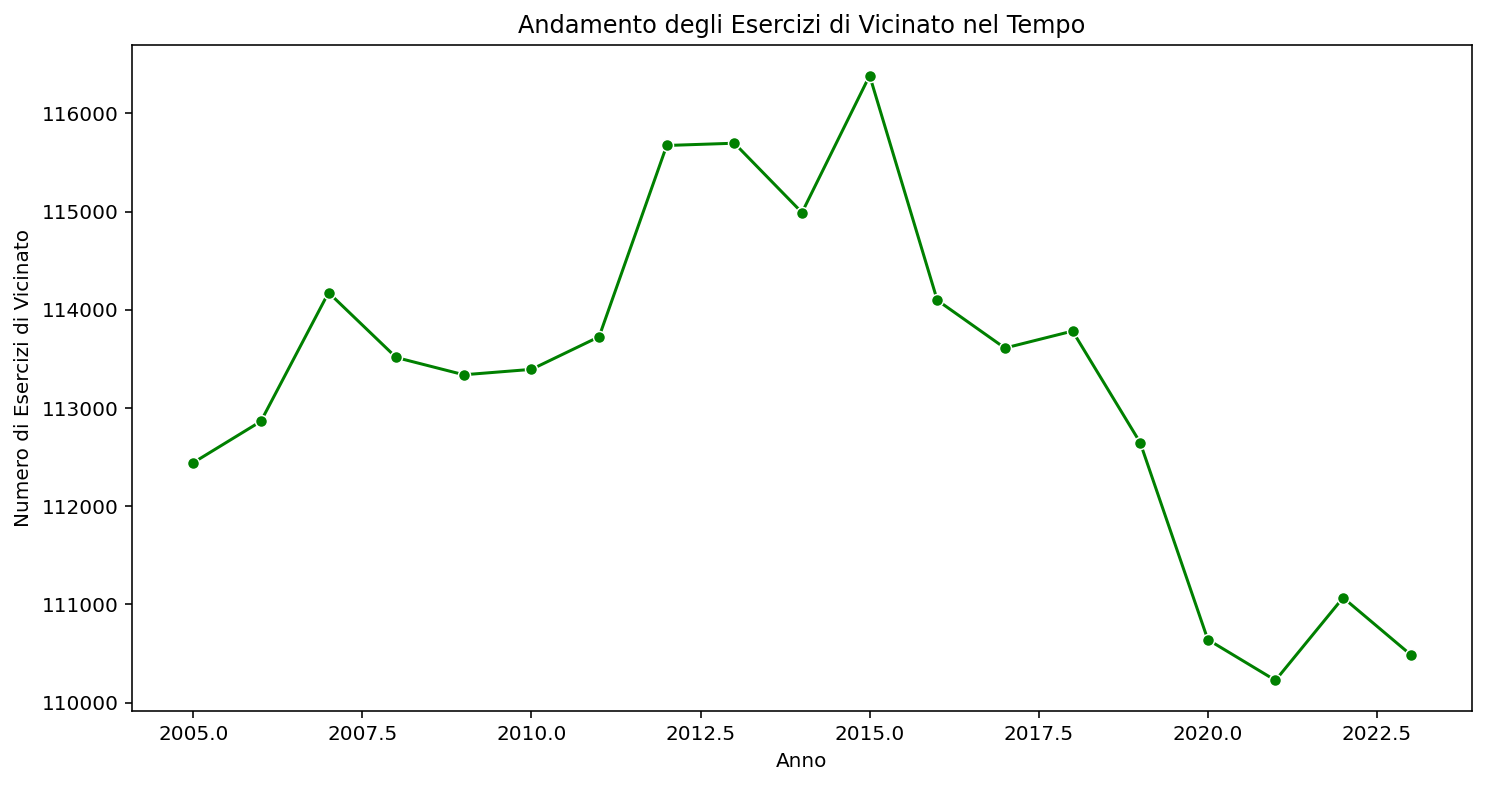

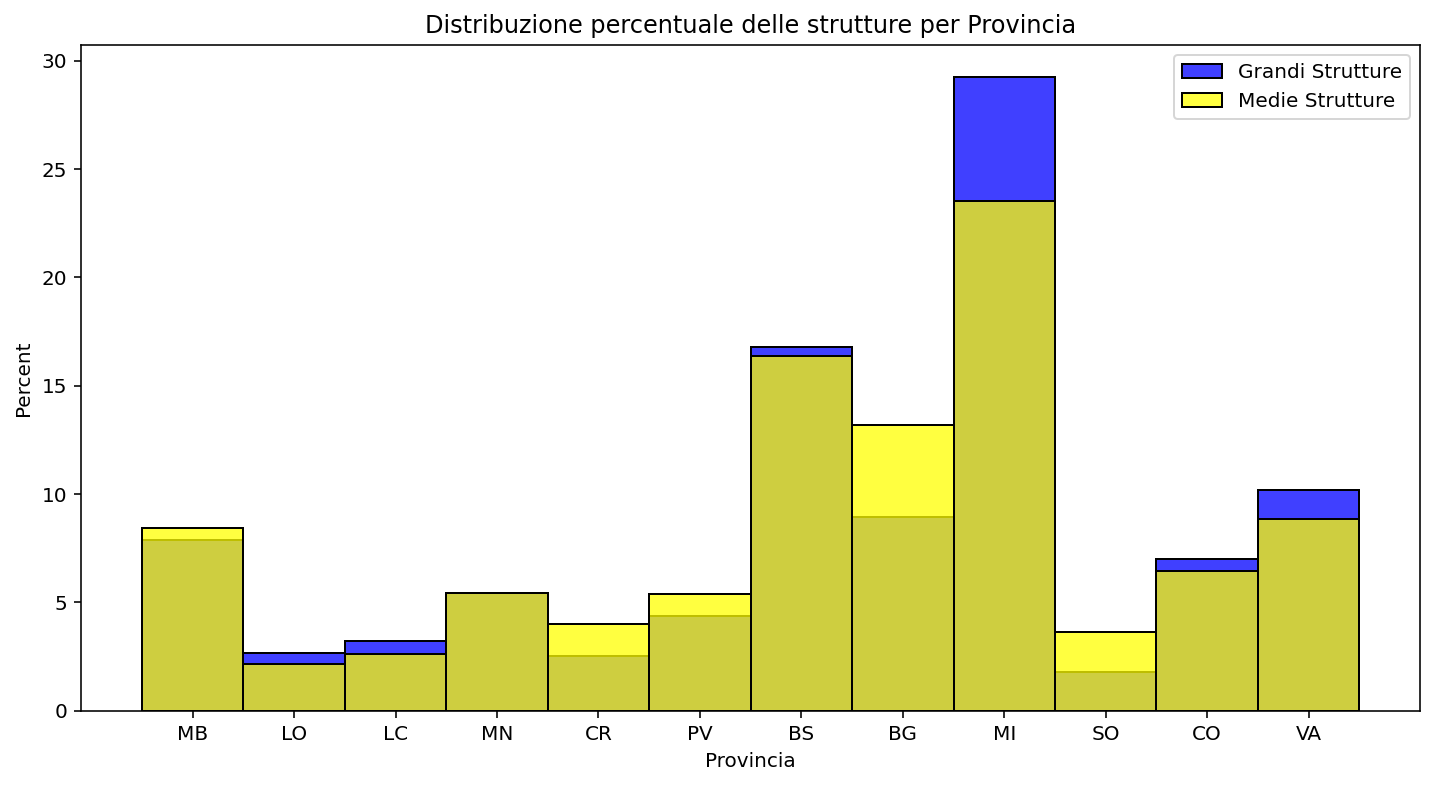

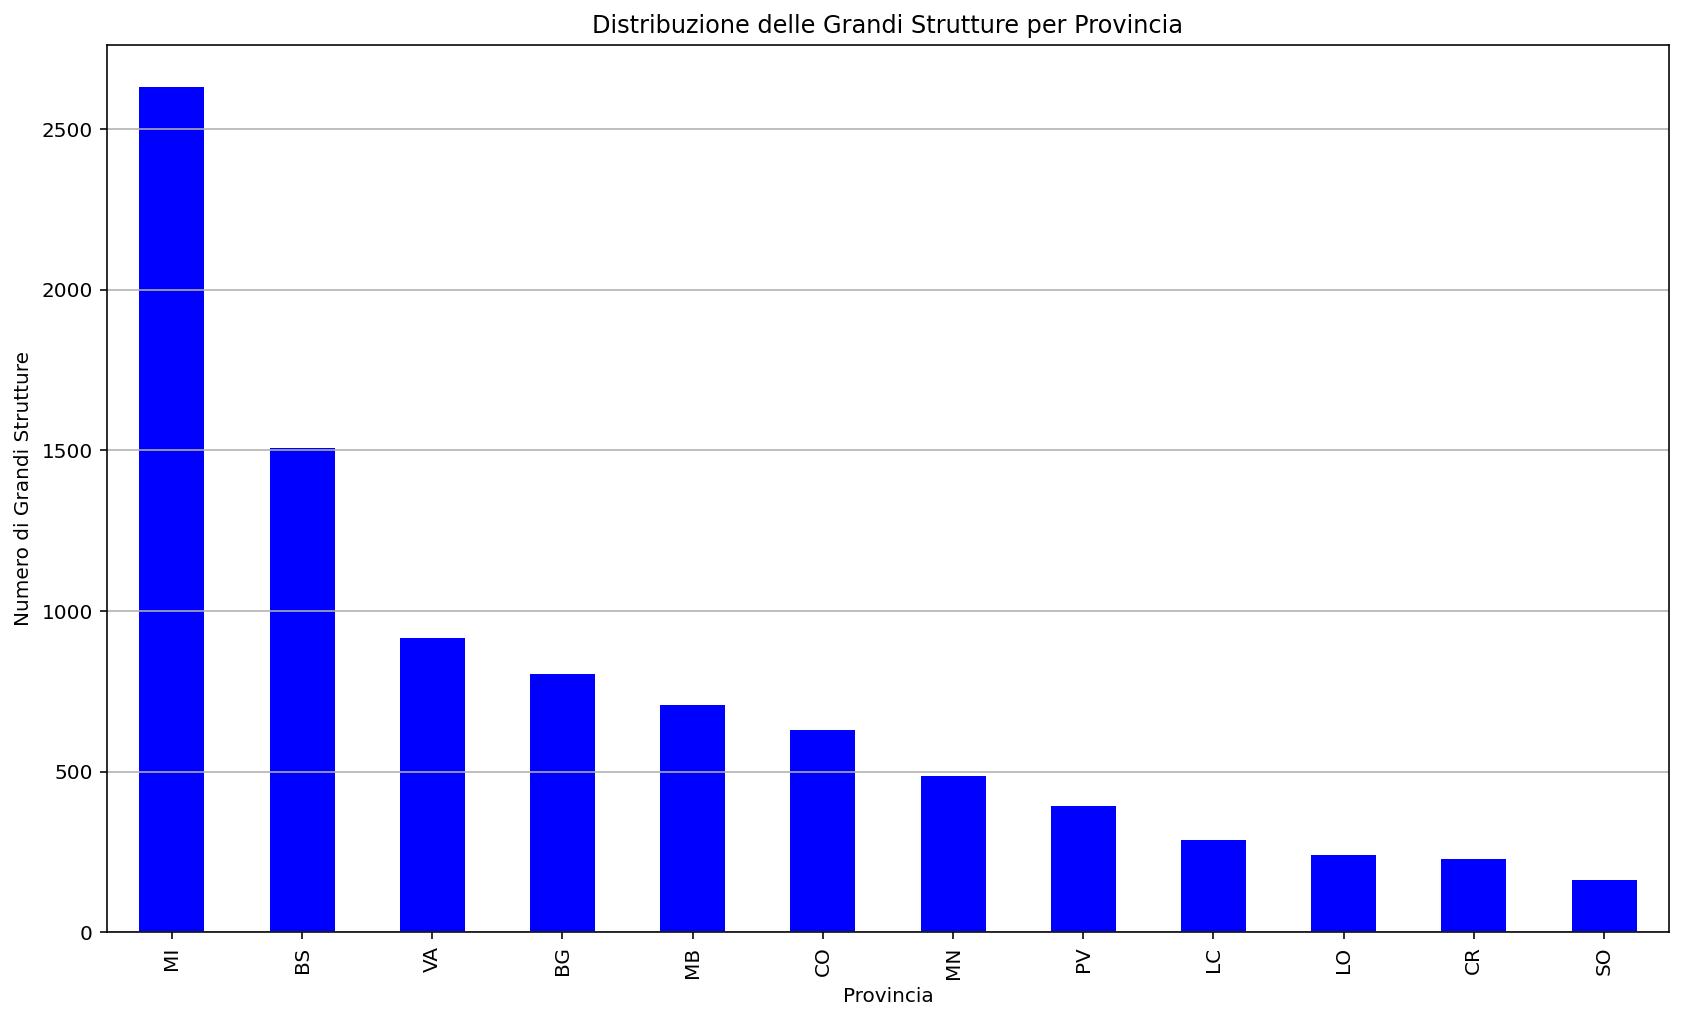

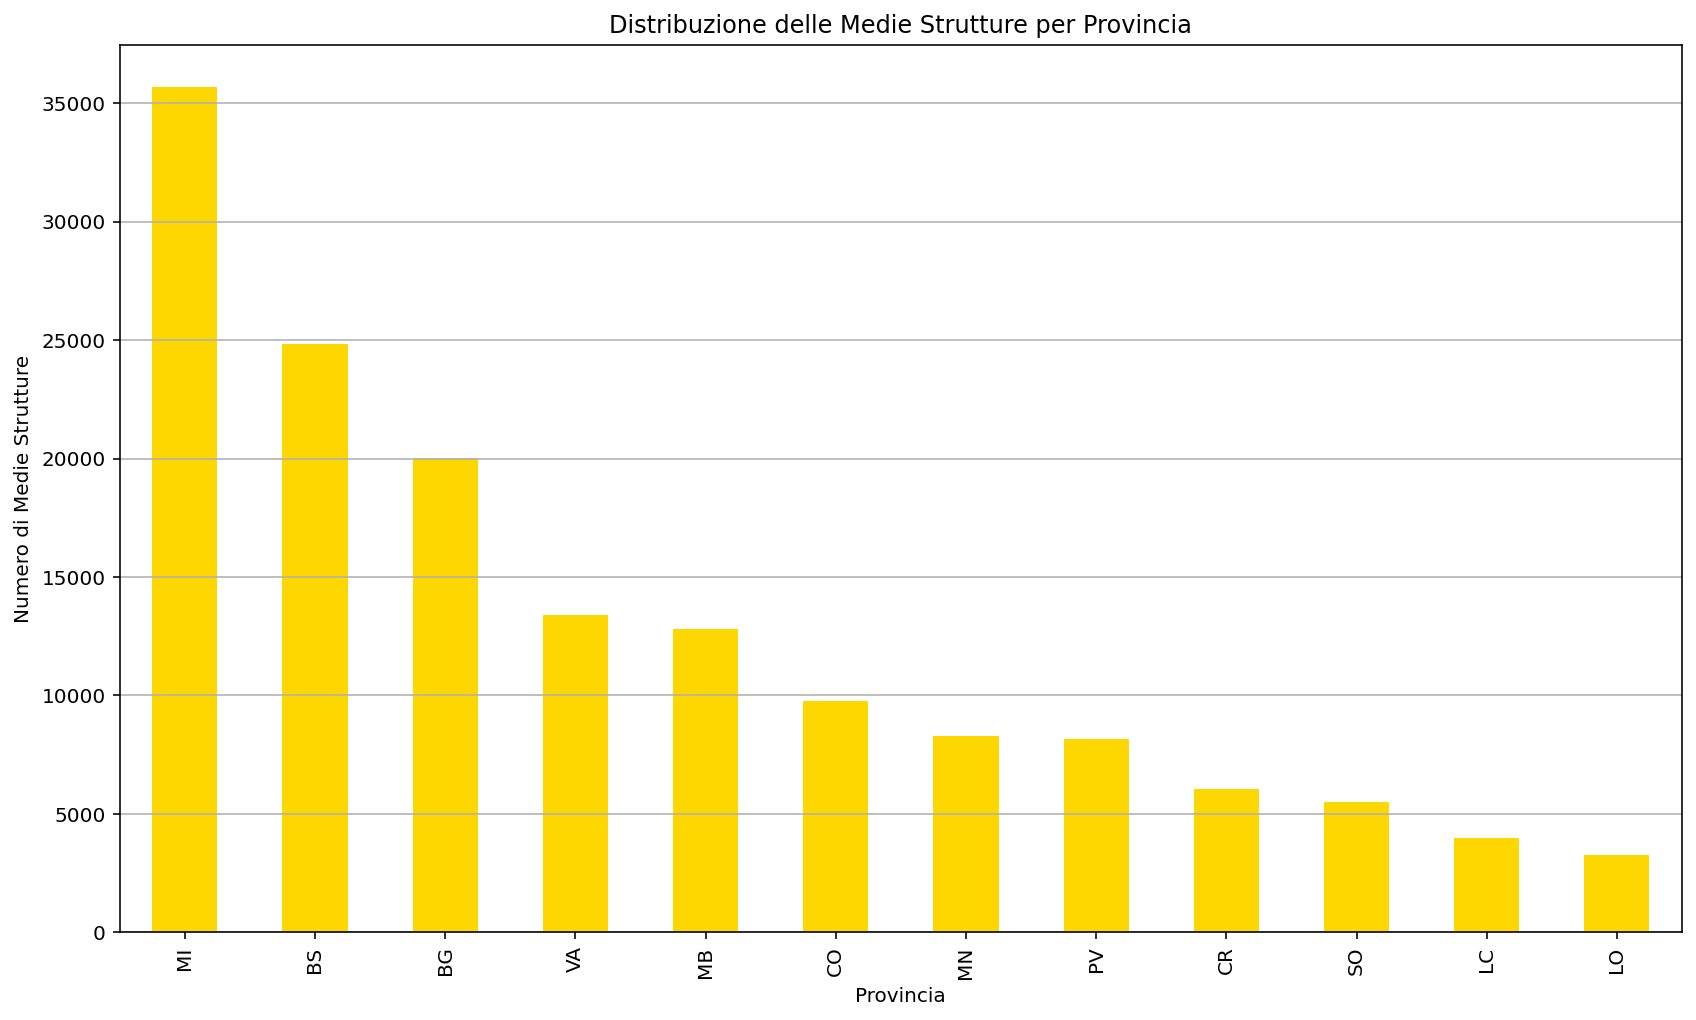

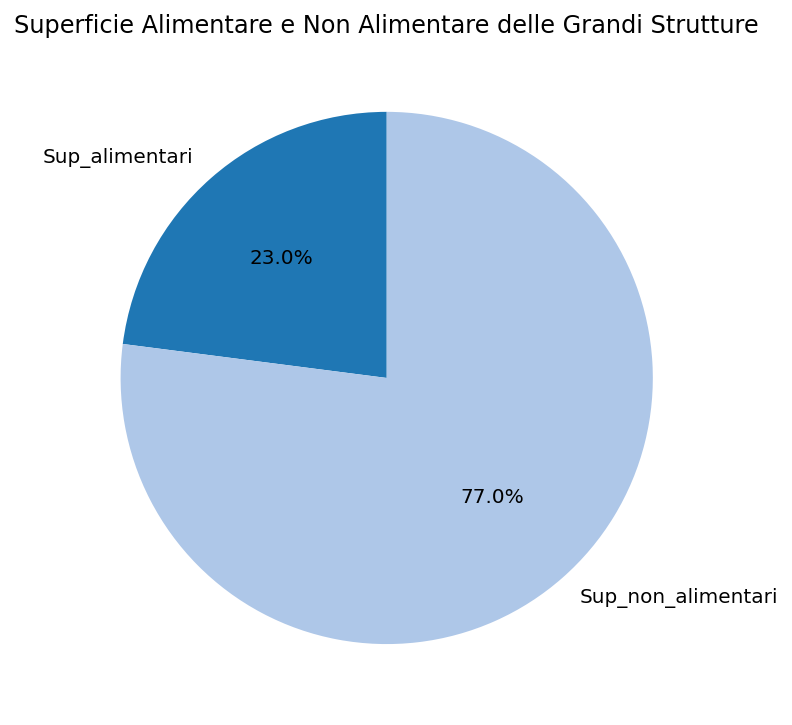

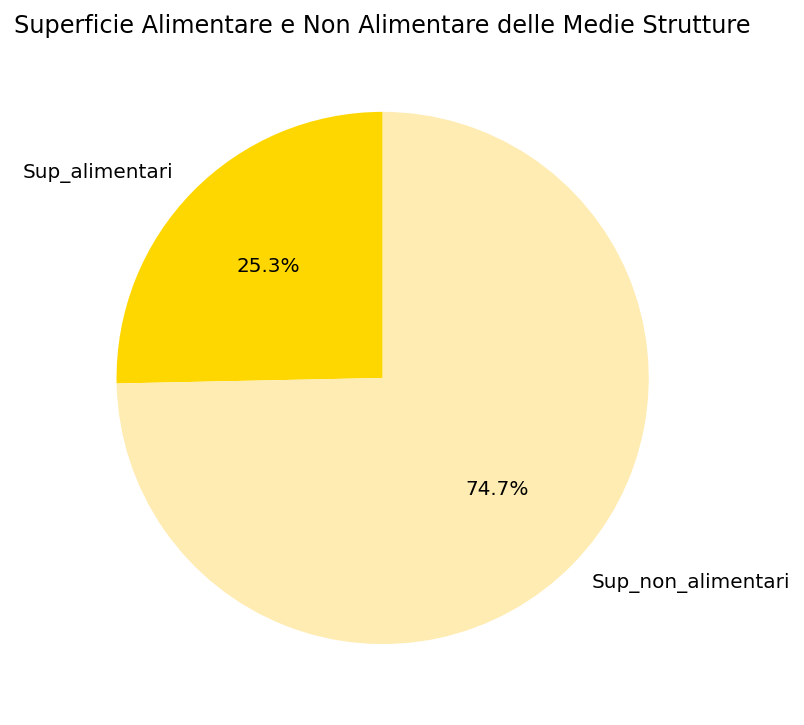

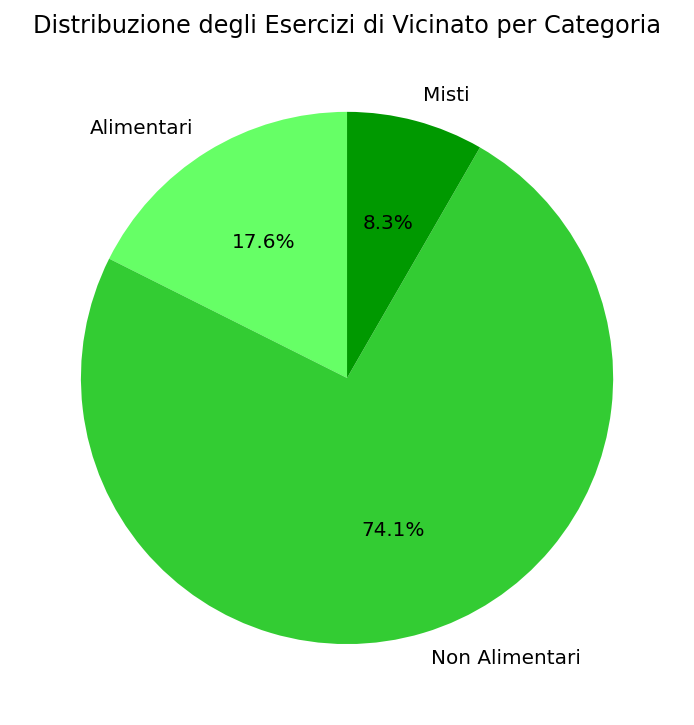

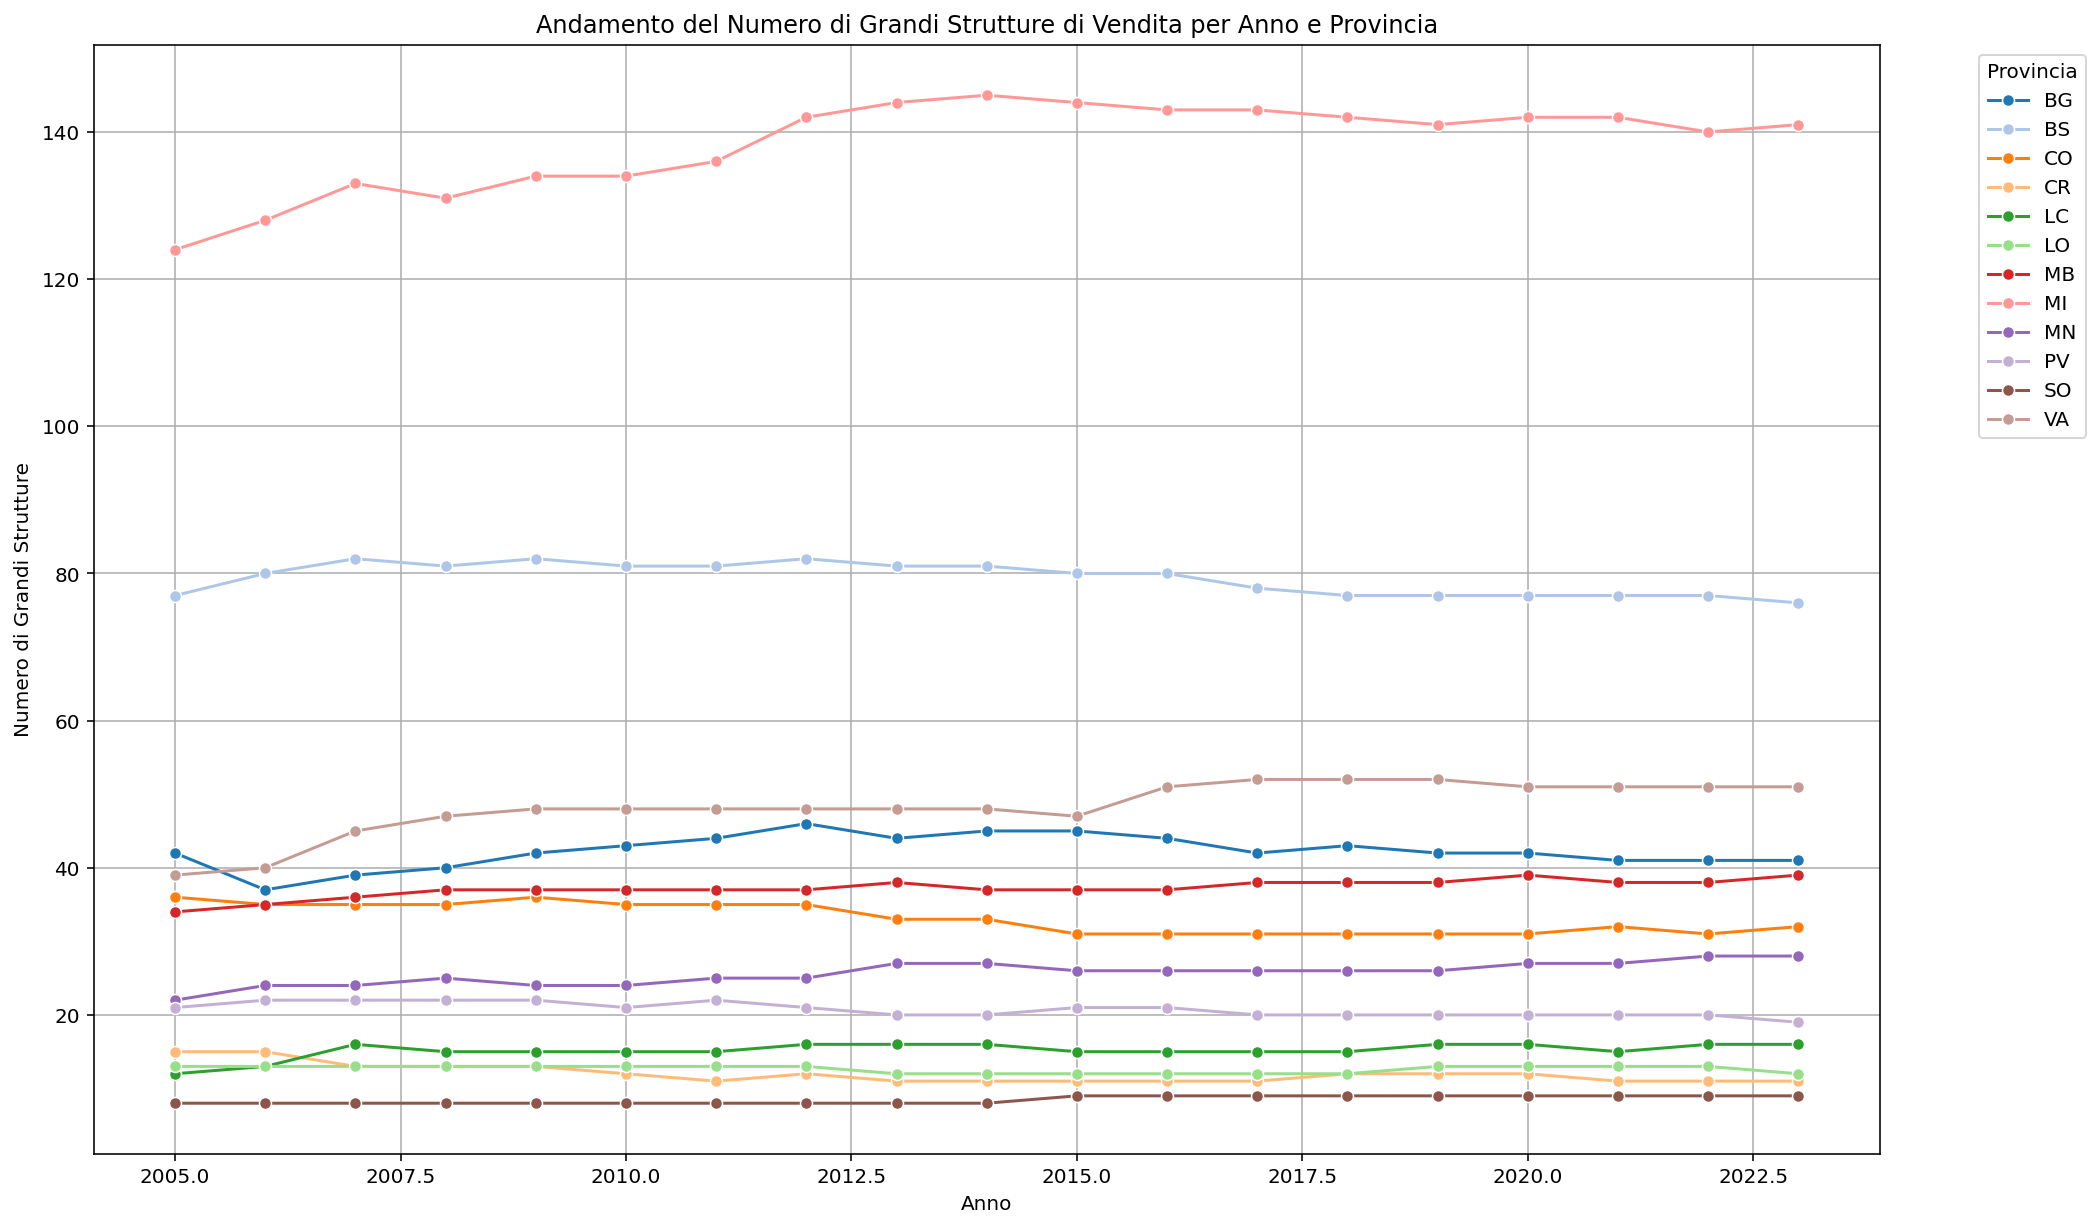

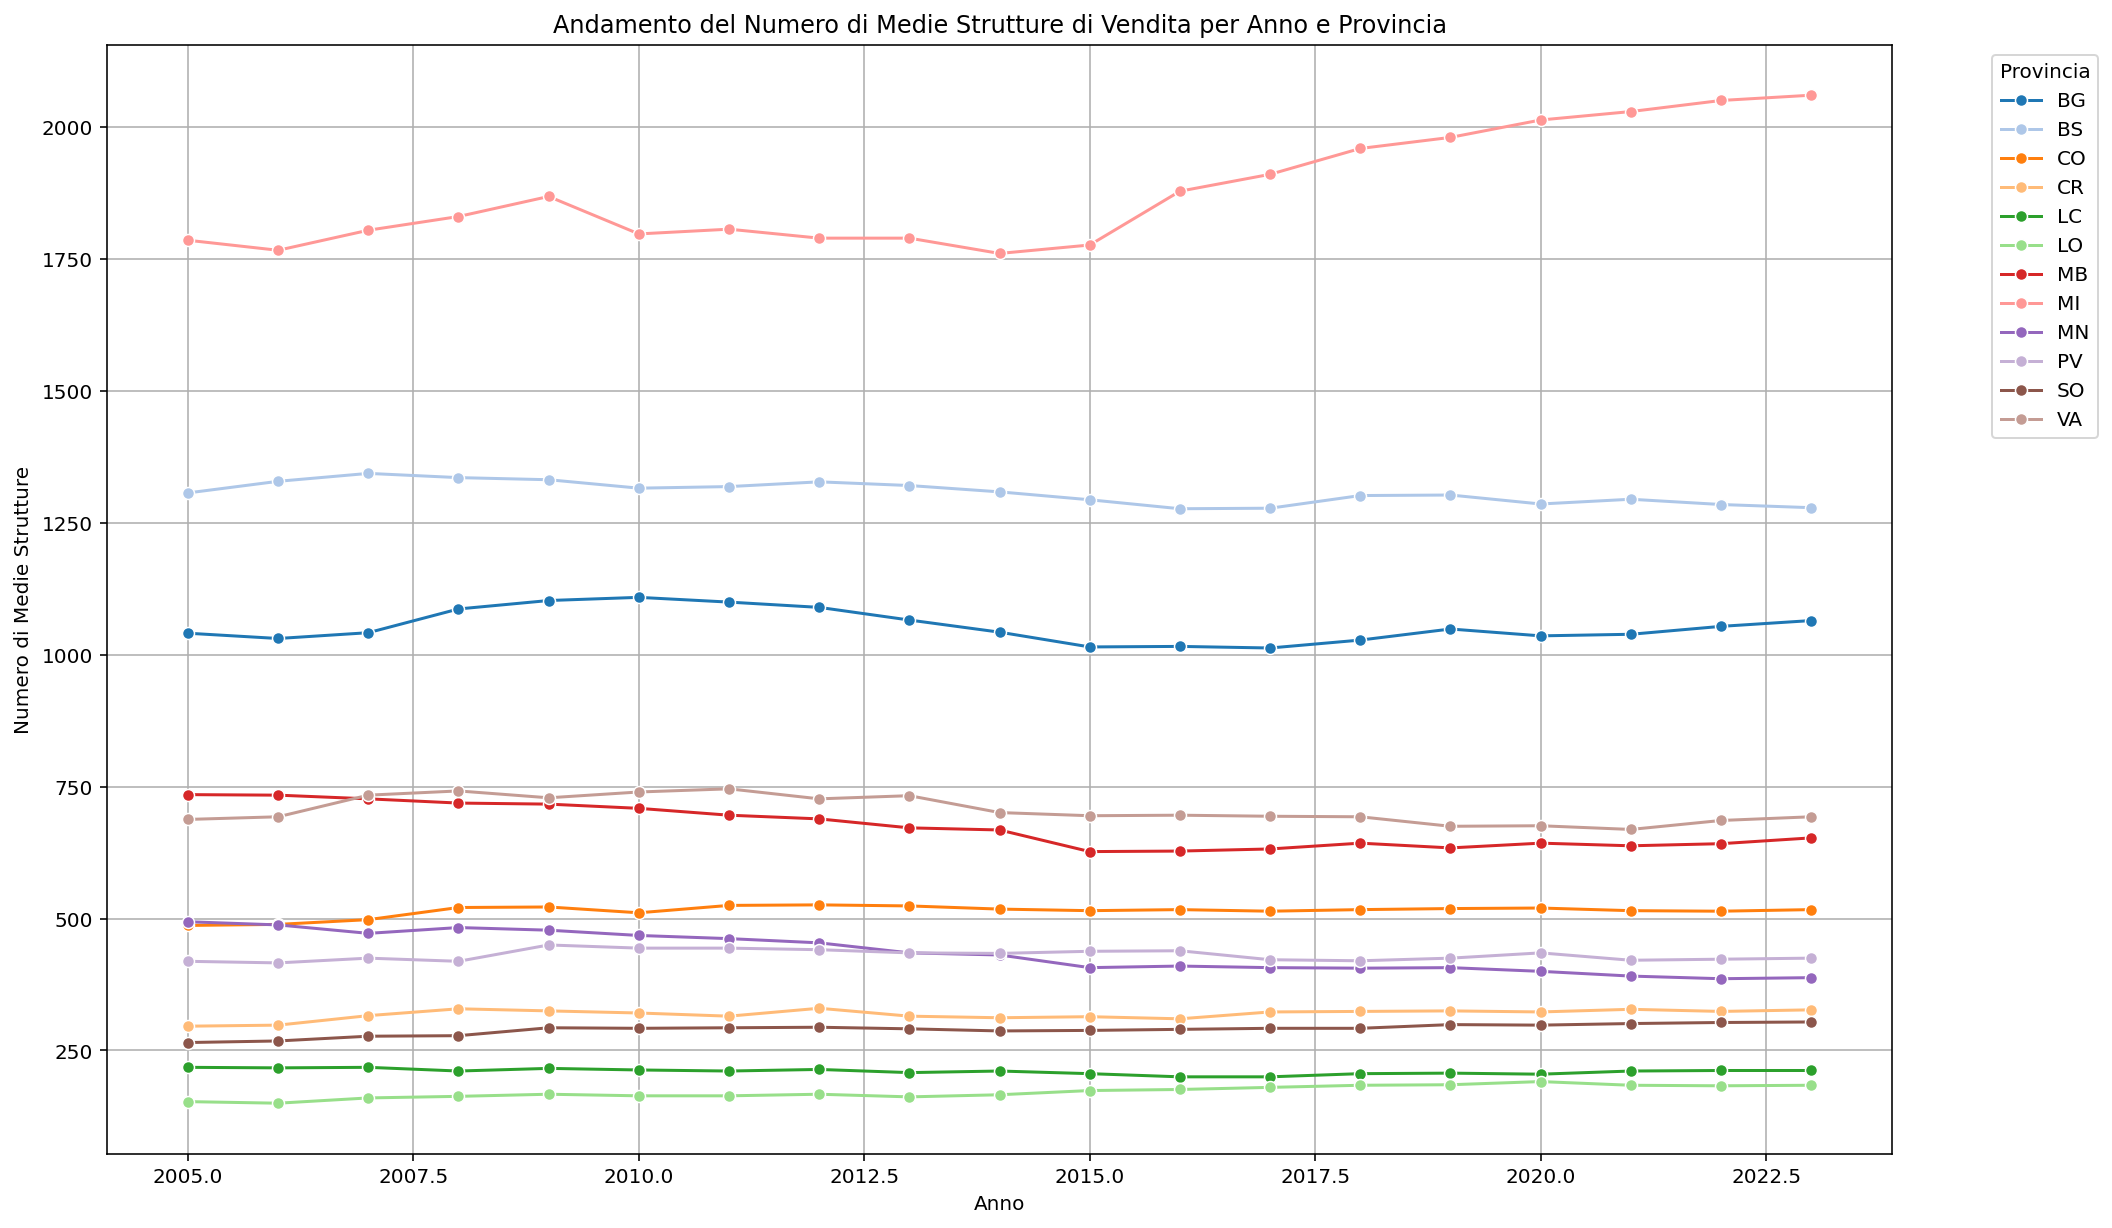

In [ ]:
#voglio produrre una dashboard che metta in mostra i confronti tra le tipologie di struttura e racchiuda i dati analizzati

dashboard_totale = pn.Column(
    pn.pane.Markdown("### Andamento delle tipologie di strutture negli anni"),
    pn.pane.Matplotlib(andamento_grandi_strutture(grandi_strutture_df), tight=True),
    pn.pane.Matplotlib(andamento_medie_strutture(medie_strutture_df), tight=True),
    pn.pane.Matplotlib(andamento_vicinato(vicinato_df), tight=True),
    pn.pane.Markdown("## Distribuzione di medie e grandi strutture per provincia"),
    pn.pane.Matplotlib(plot1(), tight=True),
    pn.pane.Matplotlib(distribuzione_frequenza_grandi_strutture(grandi_strutture_df), tight=True),
    pn.pane.Matplotlib(distribuzione_frequenza_medie_strutture(medie_strutture_df), tight=True),
    pn.pane.Markdown("## Distribuzione delle superfici per tipologia di struttura"),
    pn.pane.Matplotlib(torta_superficie_grandi_strutture(grandi_strutture_df), tight=True),
    pn.pane.Matplotlib(torta_superficie_medie_strutture(medie_strutture_df), tight=True),
    pn.pane.Matplotlib(torta_vicinato(vicinato_df), tight=True),
    pn.pane.Markdown("## Andamenti per provincia di grandi e medie strutture"),
    pn.pane.Matplotlib(andamento_grandi_per_provincia(grandi_strutture_df, 'Andamento del Numero di Grandi Strutture di Vendita per Anno e Provincia'), tight=True),
    pn.pane.Matplotlib(andamento_medie_per_provincia(medie_strutture_df, 'Andamento del Numero di Medie Strutture di Vendita per Anno e Provincia'), tight=True)
)

dashboard_totale.show()
dashboard_totale.save('dashboard_totale.html')




<function __main__.save_fig_as_png(fig, filename)>

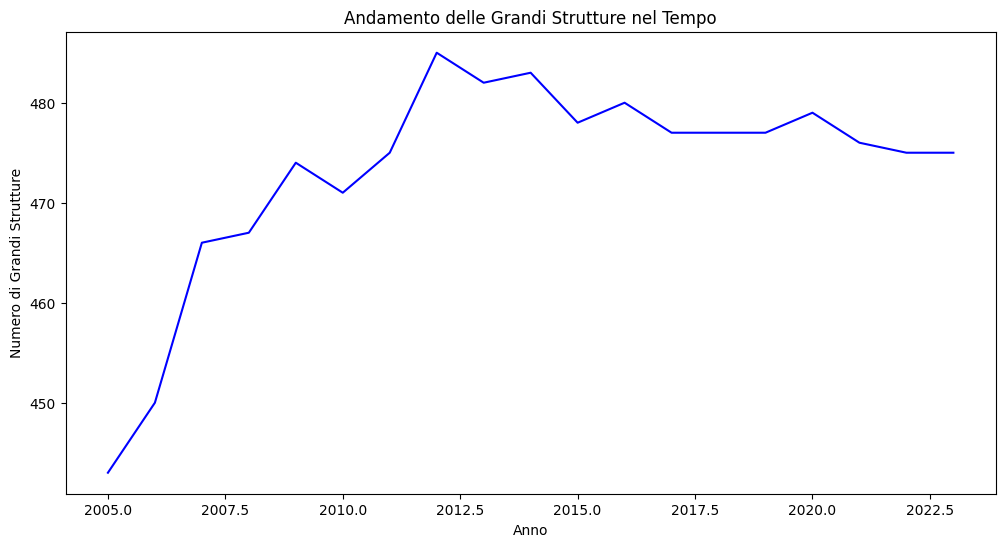

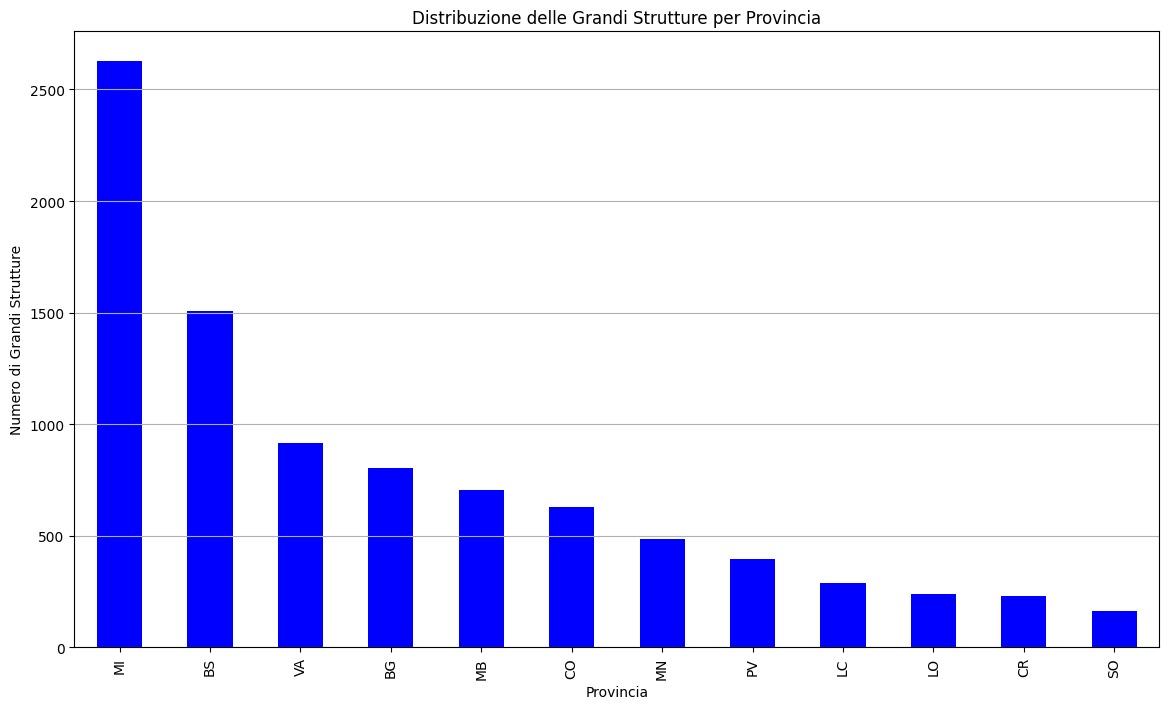

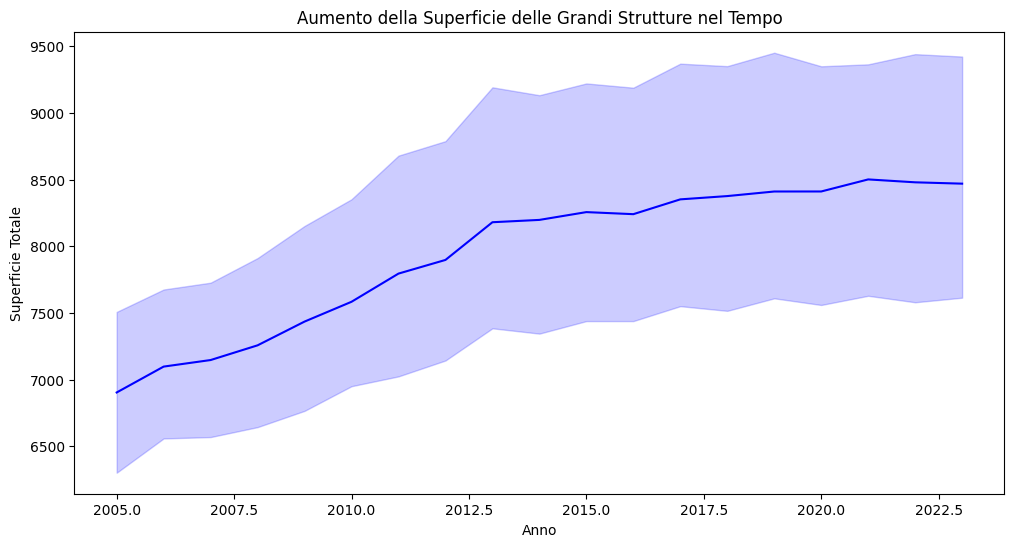

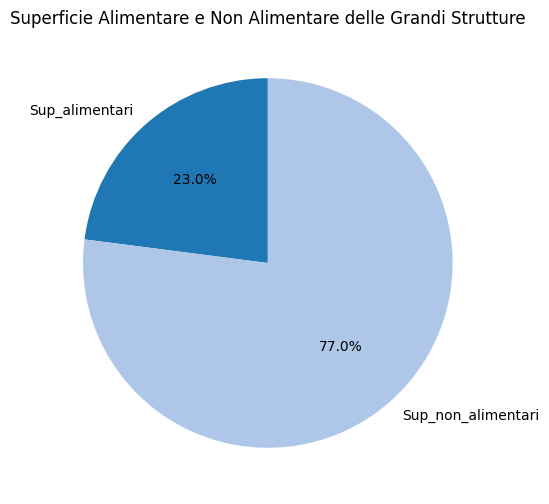

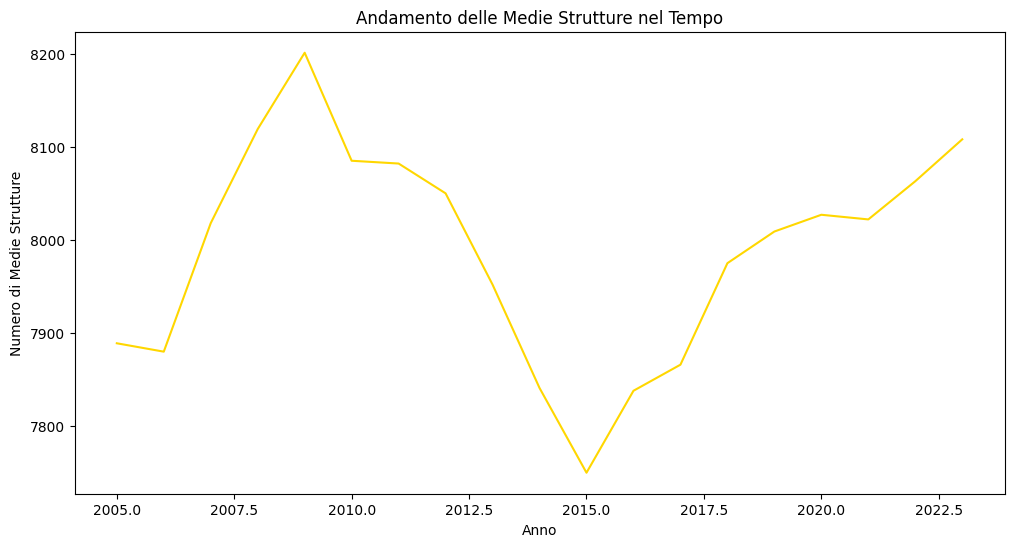

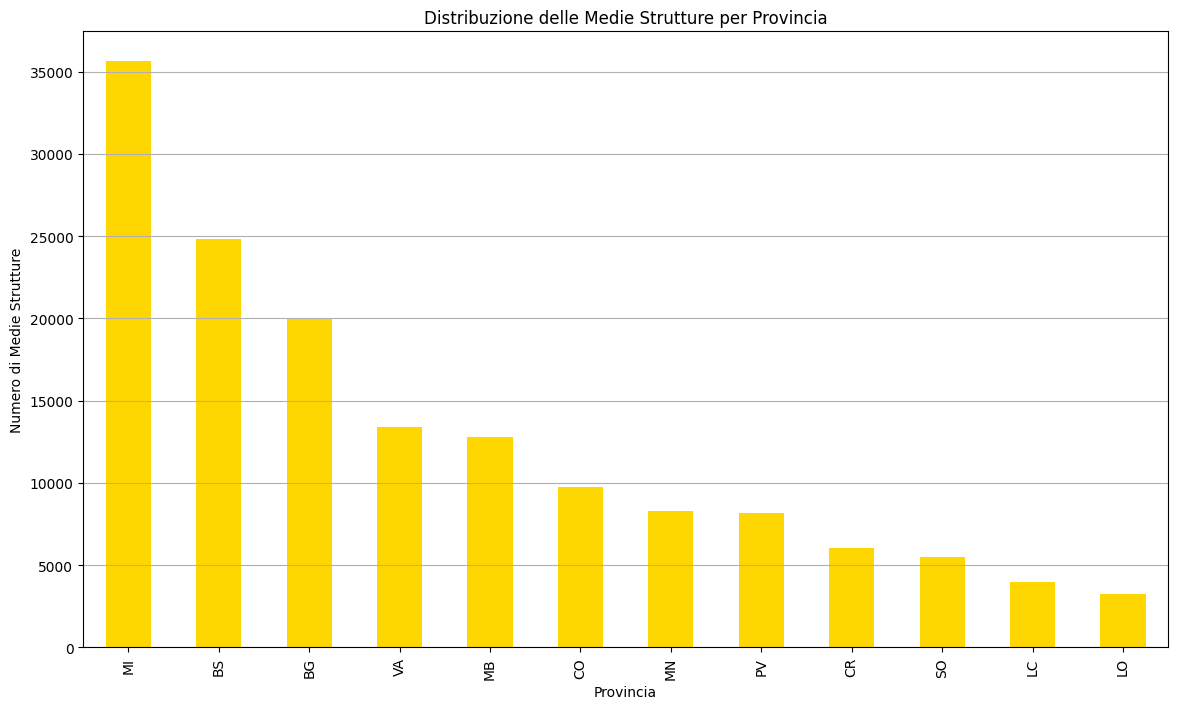

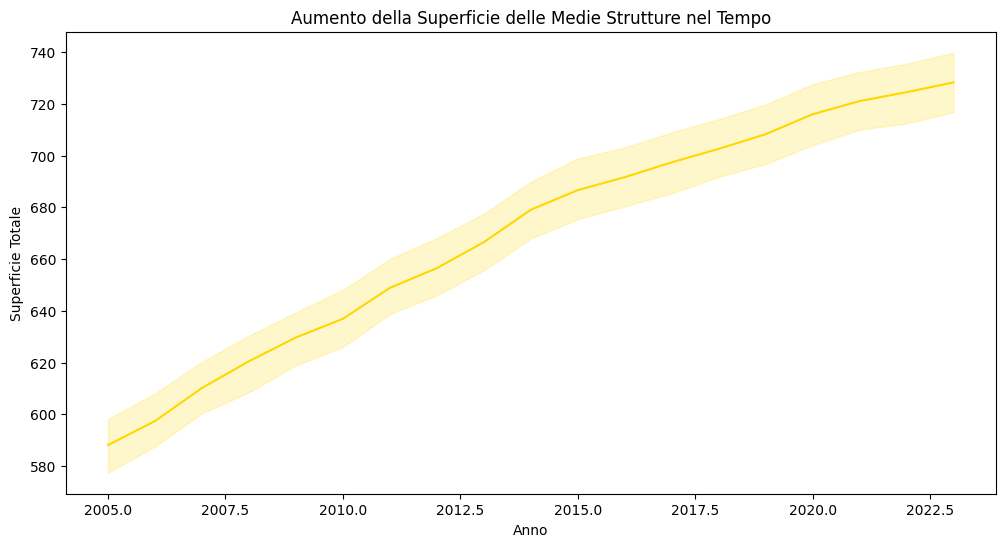

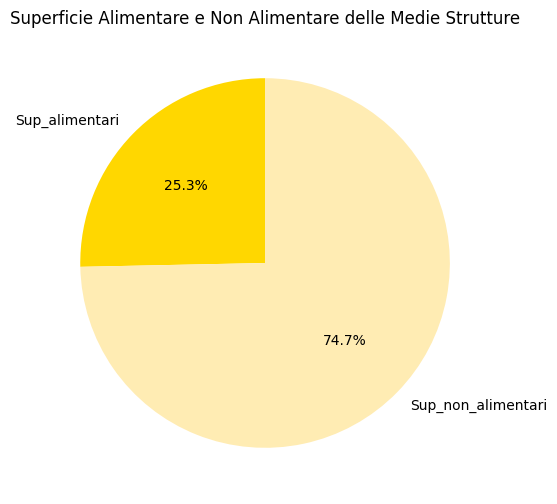

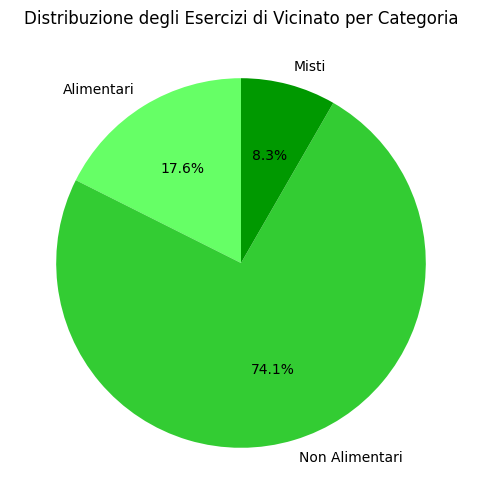

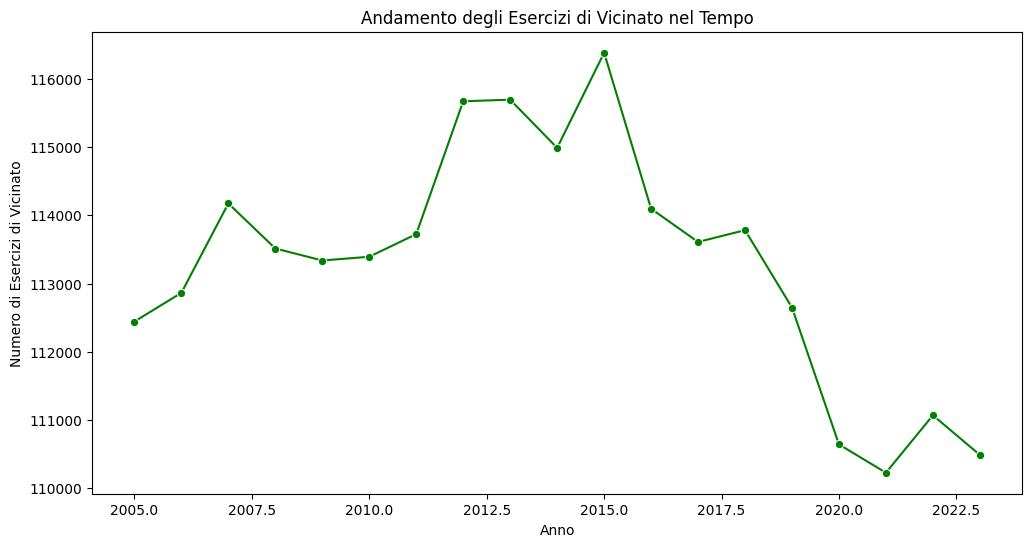

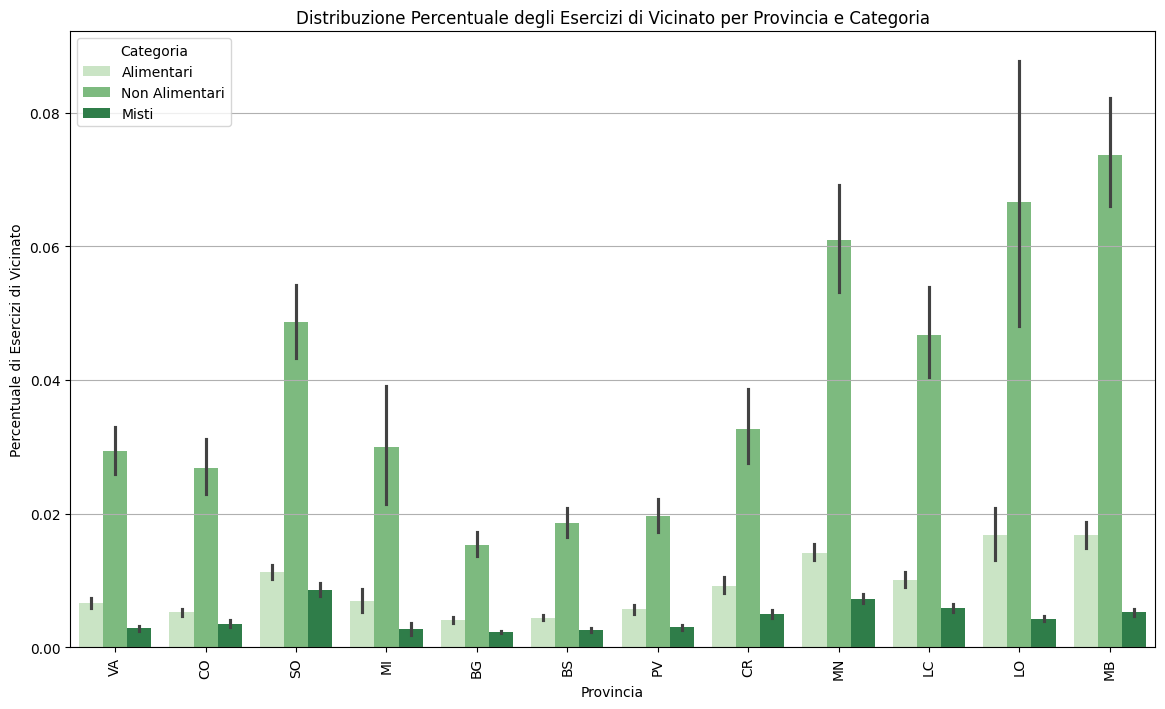

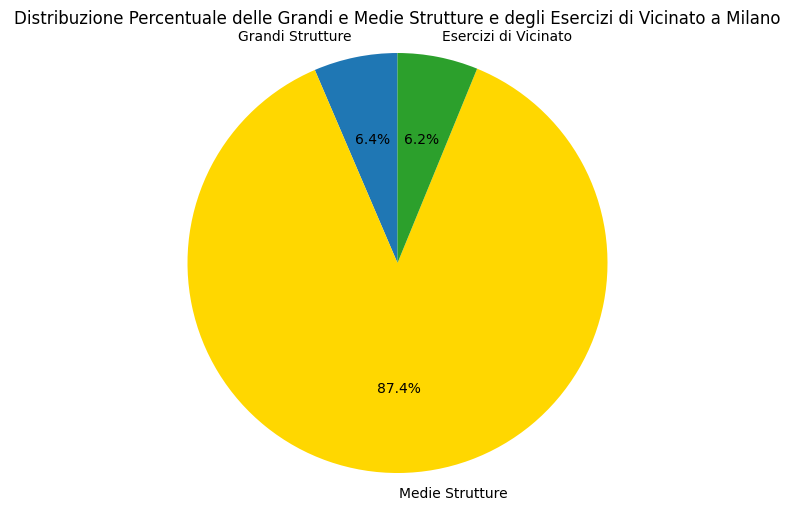

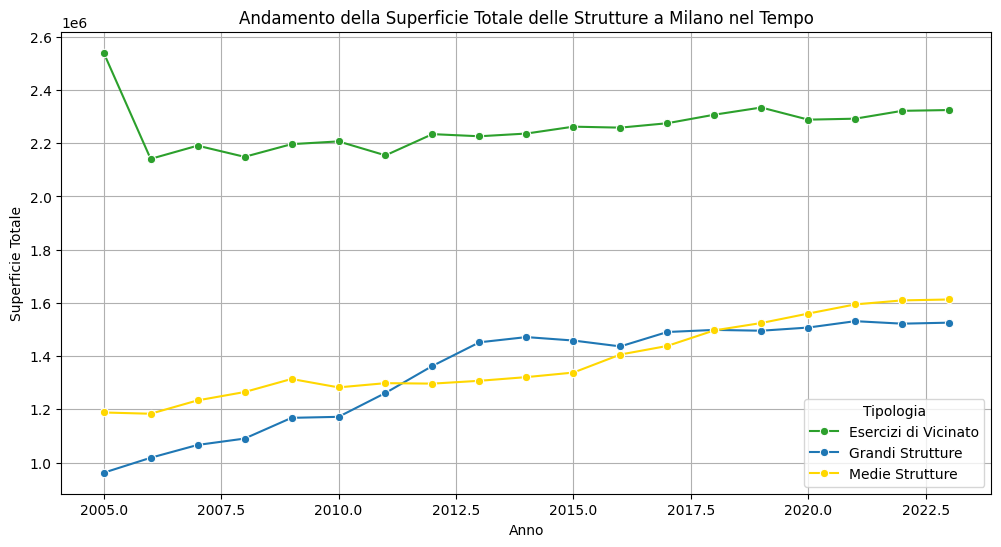

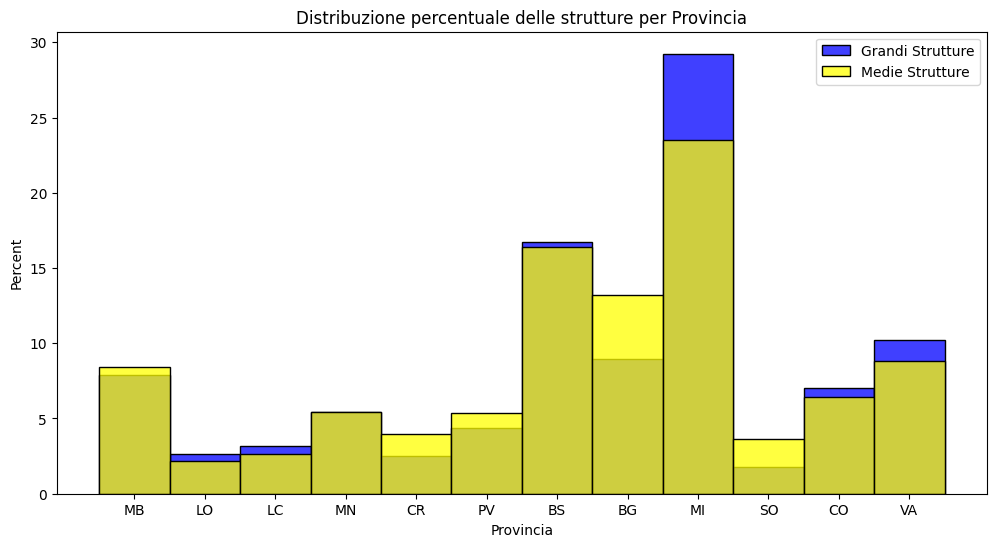

In [ ]:
#così salvo png e pdf totale

def save_fig_as_png(fig, filename):
    fig.savefig(filename, format='png')

save_fig_as_png(andamento_grandi_strutture(grandi_strutture_df), 'andamento_grandi_strutture.png')
save_fig_as_png(distribuzione_frequenza_grandi_strutture(grandi_strutture_df), 'distribuzione_frequenza_grandi_strutture.png')
save_fig_as_png(aumento_superficie_grandi_strutture(grandi_strutture_df), 'aumento_superficie_grandi_strutture.png')
save_fig_as_png(torta_superficie_grandi_strutture(grandi_strutture_df), 'torta_superficie_grandi_strutture.png')
save_fig_as_png(andamento_medie_strutture(medie_strutture_df), "andamento medie strutture"),
save_fig_as_png(distribuzione_frequenza_medie_strutture(medie_strutture_df),"frequenza medie"),
save_fig_as_png(aumento_superficie_medie_strutture(medie_strutture_df), "superificie medie"),
save_fig_as_png(torta_superficie_medie_strutture(medie_strutture_df), "torta medie"),
save_fig_as_png(torta_vicinato(vicinato_df), "torta vicinato"),
save_fig_as_png(andamento_vicinato(vicinato_df), "andamento vicinato"),
save_fig_as_png(distribuzione_geografica_vicinato(vicinato_df), "grafica vicinato")
save_fig_as_png(torta_distribuzione_strutture_milano(milano_grandi_df, milano_medie_df, milano_vicinato_df), "torta milano"),
save_fig_as_png(andamento_superficie_totale_milano(combined_df),"superfici milano")
save_fig_as_png(plot1(), "distribuzione percentuale province grandi e medie")
save_fig_as_png